In [1]:
import argparse
import pandas as pd
from scripts.aux_msa_functions import *
import time
from scipy.spatial.distance import cdist
import os
import numpy as np
import torch
from Bio import Phylo
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

torch.set_grad_enabled(False)

In [23]:
scores_folders = [
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/static-context/10/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/random/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/10/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/random/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/static-context/20/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/random/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/20/PF00004",                   
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/greedy/PF00004",
                  "./scores/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/random/PF00004",
                  "./scores/msa-seed-simulations/ESM2/PF00004",
                  "./scores/msa-seed-simulations/Potts/PF00004",
                  "./scores/protein-families-msa-full-samples",
                  #"./scores/protein-families-msa-seed",
                  # "./scores/no_phylogeny/50-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/msa_prob_dist-proposal/context-size-10",
                  # "./scores/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./scores/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",                 
                ]

tool_types = [
                "MSA-randomprop-static-10","MSA-randomprop-dynamic-greedy-10","MSA-randomprop-dynamic-random-10",
                "MSA-msaprop-static-10","MSA-msaprop-dynamic-greedy-10","MSA-msaprop-dynamic-random-10",
                "MSA-randomprop-static-20","MSA-randomprop-dynamic-greedy-20","MSA-randomprop-dynamic-random-20",
                "MSA-msaprop-static-20","MSA-msaprop-dynamic-greedy-20","MSA-msaprop-dynamic-random-20",
                "ESM2","Potts",
                "full_sampling"
                # "nat",
                # "MSA-msaprop-no-phylogeny-50",
                # "MSA-msaprop-no-phylogeny-100",
                # "MSA-randomprop-no-phylogeny-100",
                # "MSA-msaprop-no-phylogeny-500",
                # "MSA-randomprop-no-phylogeny-500",
                # "MSA-ft-msaprop-no-phylogeny-500",
                # "MSA-msaprop-no-phylogeny-1000",
                # "MSA-randomprop-no-phylogeny-1000",
            ]

msa_folders = [
                  # "./data/msa-seed-simulations/MSA-1b/random-proposal/static-context/10/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/greedy/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/10/random/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/10/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/greedy/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/10/random/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/random-proposal/static-context/20/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/greedy/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/random-proposal/dynamic-context/20/random/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/static-context/20/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/greedy/PF00004",
                  # "./data/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/dynamic-context/20/random/PF00004",
                  # "./data/msa-seed-simulations/ESM2/PF00004",
                  # "./data/msa-seed-simulations/Potts/PF00004",
                  # "./data/protein-families-msa-seed",
                  # "./data/msa-seed-simulations/no_phylogeny/50-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/100-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  "./data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  "./data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                  "./data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b-finetuned-PF00004/msa_prob_dist-proposal/context-size-10"
                  # "./data/msa-seed-simulations/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004",
                  # "./data/msa-seed-simulations/no_phylogeny/1000-mutations/50-sequences/msa-seed-simulations/MSA-1b/random-proposal/context-size-10/PF00004",
                    
                ]

tree_path = "./data/seed-trees/PF00004_seed.newick"
tree = Phylo.read(tree_path,"newick")
tree.root_at_midpoint()

## Initial Processing

#### No Averaging

In [3]:
tool_scores_dict = {}

for j,folder in enumerate(scores_folders):
    
    main_dataframe = pd.DataFrame()
    
    for i,file in enumerate(os.listdir(folder)):

        file_sim_ind = file.split('.')[0]
        file_sim_ind = int(file_sim_ind.split('-')[1])

        row = {"tool":tool_types[j],"sim_ind":file_sim_ind}
        file_path = os.path.join(folder,file)
        df = pd.read_csv(file_path, delimiter="\t")
        
        names = [elem + "_mean" for elem in list(df.columns)]
        df.columns = names

        df["tool"] = tool_types[j]
        df["sim_ind"] = file_sim_ind
        
        main_dataframe = pd.concat((main_dataframe, df)).reset_index(drop=True)

    main_dataframe = pd.DataFrame(main_dataframe)
    tool_scores_dict.update({tool_types[j]:main_dataframe})

if "nat" in list(tool_scores_dict.keys()):
    tool_scores_dict["nat"]["min_natural_ham_dist_seed_mean"] = [None]
    tool_scores_dict["nat"]["min_natural_ham_dist_full_mean"] = [None]

#### Averaging

In [15]:
tool_scores_dict = {}

for j,folder in enumerate(scores_folders):
    
    main_dataframe = []
    
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1

        row = {"tool":tool_types[j],"sim_ind":file_sim_ind}
        
        file_path = os.path.join(folder,file)
        df = pd.read_csv(file_path, delimiter="\t")
        
        df = df.iloc[:,4:].mean(axis = 0)

        names = [elem + "_mean" for elem in list(df.index)]
        df.index = names

        record = df.to_dict()
        row.update(record)

        main_dataframe.append(row)

    main_dataframe = pd.DataFrame(main_dataframe)
    tool_scores_dict.update({tool_types[j]:main_dataframe})

if "nat" in list(tool_scores_dict.keys()):
    tool_scores_dict["nat"]["min_natural_ham_dist_seed_mean"] = [None]
    tool_scores_dict["nat"]["min_natural_ham_dist_full_mean"] = [None]

In [16]:
all_metrics_dataframe = pd.concat([df for _,df in tool_scores_dict.items()]).reset_index(drop=True)

large_metrics_dataframe = all_metrics_dataframe[["tool","sim_ind","hmmer_seq_score_mean","stat_energy_scores_mean"]]
small_metrics_dataframe = all_metrics_dataframe[["tool","sim_ind","min_natural_ham_dist_seed_mean","min_natural_ham_dist_full_mean","max_self_ham_distance_mean"]]

melted_large_metrics_dataframe = pd.melt(large_metrics_dataframe, id_vars=["tool","sim_ind"], var_name="score_type")
melted_small_metrics_dataframe = pd.melt(small_metrics_dataframe, id_vars=["tool","sim_ind"], var_name="score_type")

### HMMer Scores

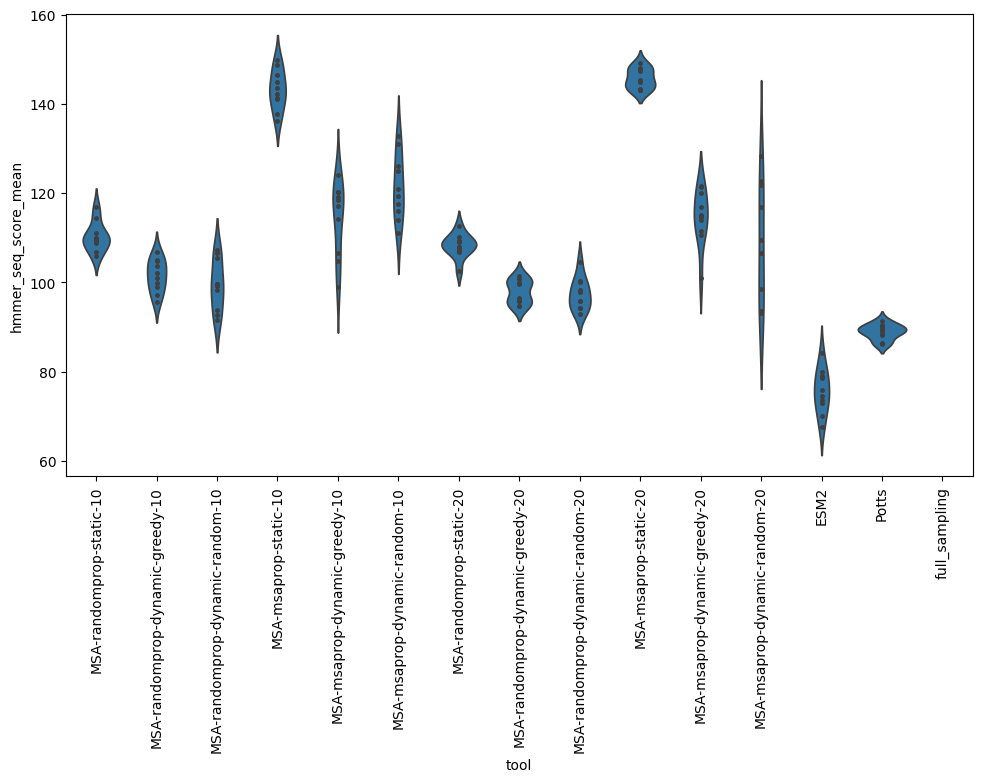

In [17]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="hmmer_seq_score_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('hmmer_seq_score_mean.png')

plt.show()



## Statistical Energy Scores

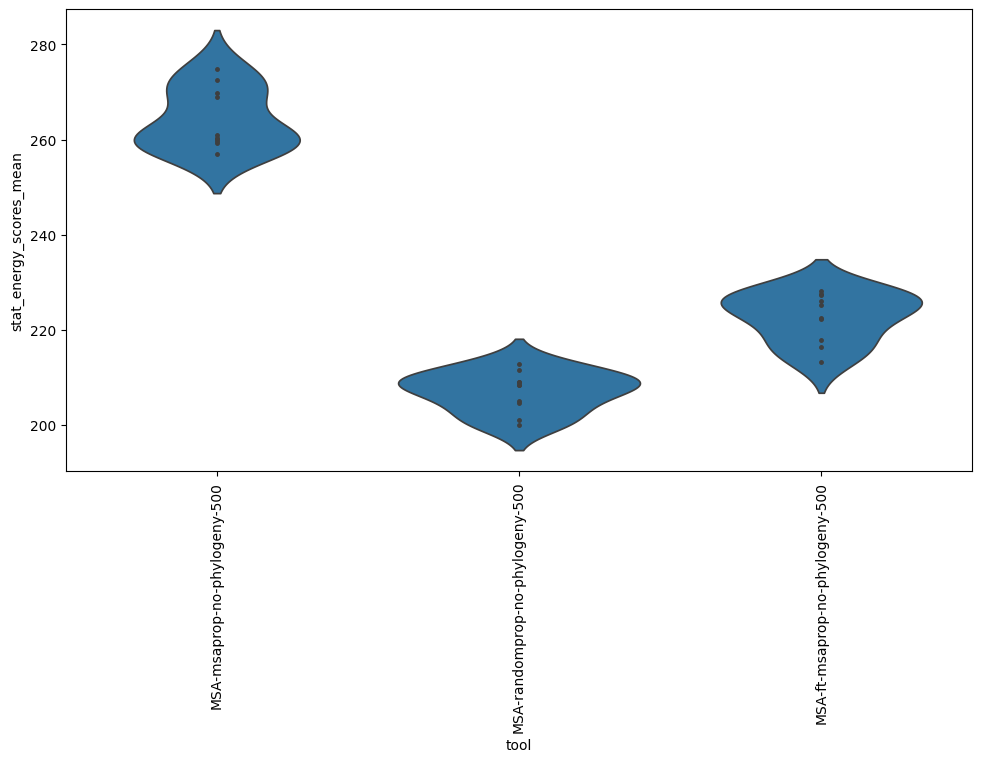

In [7]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="stat_energy_scores_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('stat_energy_scores_mean.png')

plt.show()

## Average Minimum Distance to a Natural Sequence

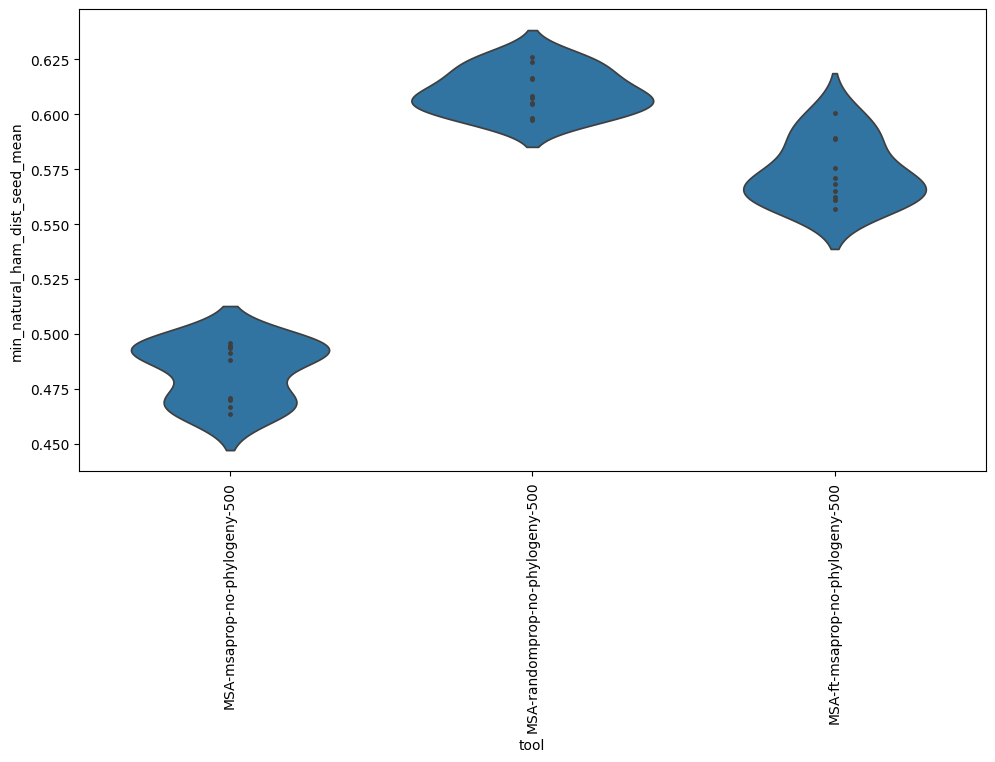

In [8]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="min_natural_ham_dist_seed_mean", x="tool", inner="point")
plt.xticks(rotation=90)

# plt.savefig('min_natural_ham_dist_seed_mean.png')

plt.show()

## Average Maximum Distance within an MSA

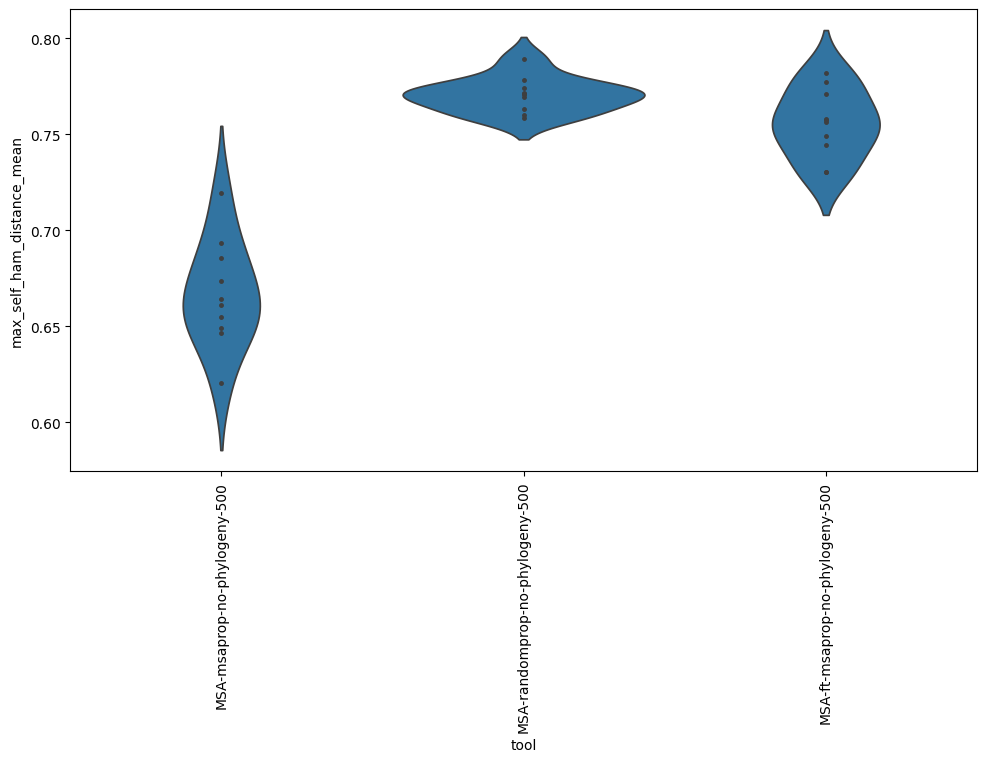

In [9]:
rcParams['figure.figsize'] = 11.7,6

fig = sns.violinplot(data = all_metrics_dataframe, y="max_self_ham_distance_mean", x="tool", inner="point")
plt.xticks(rotation=90)

plt.savefig('max_self_ham_dist_seed_mean.png')

plt.show()

## Shannon Entropy Comparison (Simulated Vs Natural)

In [18]:
from scipy.stats import entropy

se_dataframe = pd.DataFrame(columns=["tool","sim_ind","column_number","shannon_entropy_sim","shannon_entropy_corr_nat"])


for j,folder in enumerate(scores_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] == "nat":
            continue

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1
            
        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        
        sim_array = pd.DataFrame([list(seq) for seq in df["sequence"]]) 
        nat_array = pd.DataFrame([list(seq) for seq in df["corr_nat_seq"]])

        entropy_df = []

        for k in range(sim_array.shape[1]):

            entropy_sim = entropy(sim_array.iloc[:,k].value_counts())
            entropy_nat = entropy(nat_array.iloc[:,k].value_counts())

            entropy_df.append({"tool":tool_types[j],"sim_ind": file_sim_ind, "column_number": k + 1, 
                               "shannon_entropy_sim":entropy_sim,"shannon_entropy_corr_nat":entropy_nat}) 

        entropy_df = pd.DataFrame(entropy_df)

        se_dataframe = pd.concat((se_dataframe, entropy_df)).reset_index(drop=True)

se_dataframe_stats = se_dataframe.groupby(["tool","column_number"]).describe().reset_index()
se_dataframe_stats.columns = ["tool","column_number"] + [f"{tup1}_{tup2}" for tup1, tup2 in list(se_dataframe_stats.columns)[2:]]
se_dataframe_stats = se_dataframe_stats.iloc[:,:12].drop("shannon_entropy_corr_nat_count", axis = 1).rename(columns  = {"shannon_entropy_corr_nat_mean":"shannon_entropy_corr_nat"})

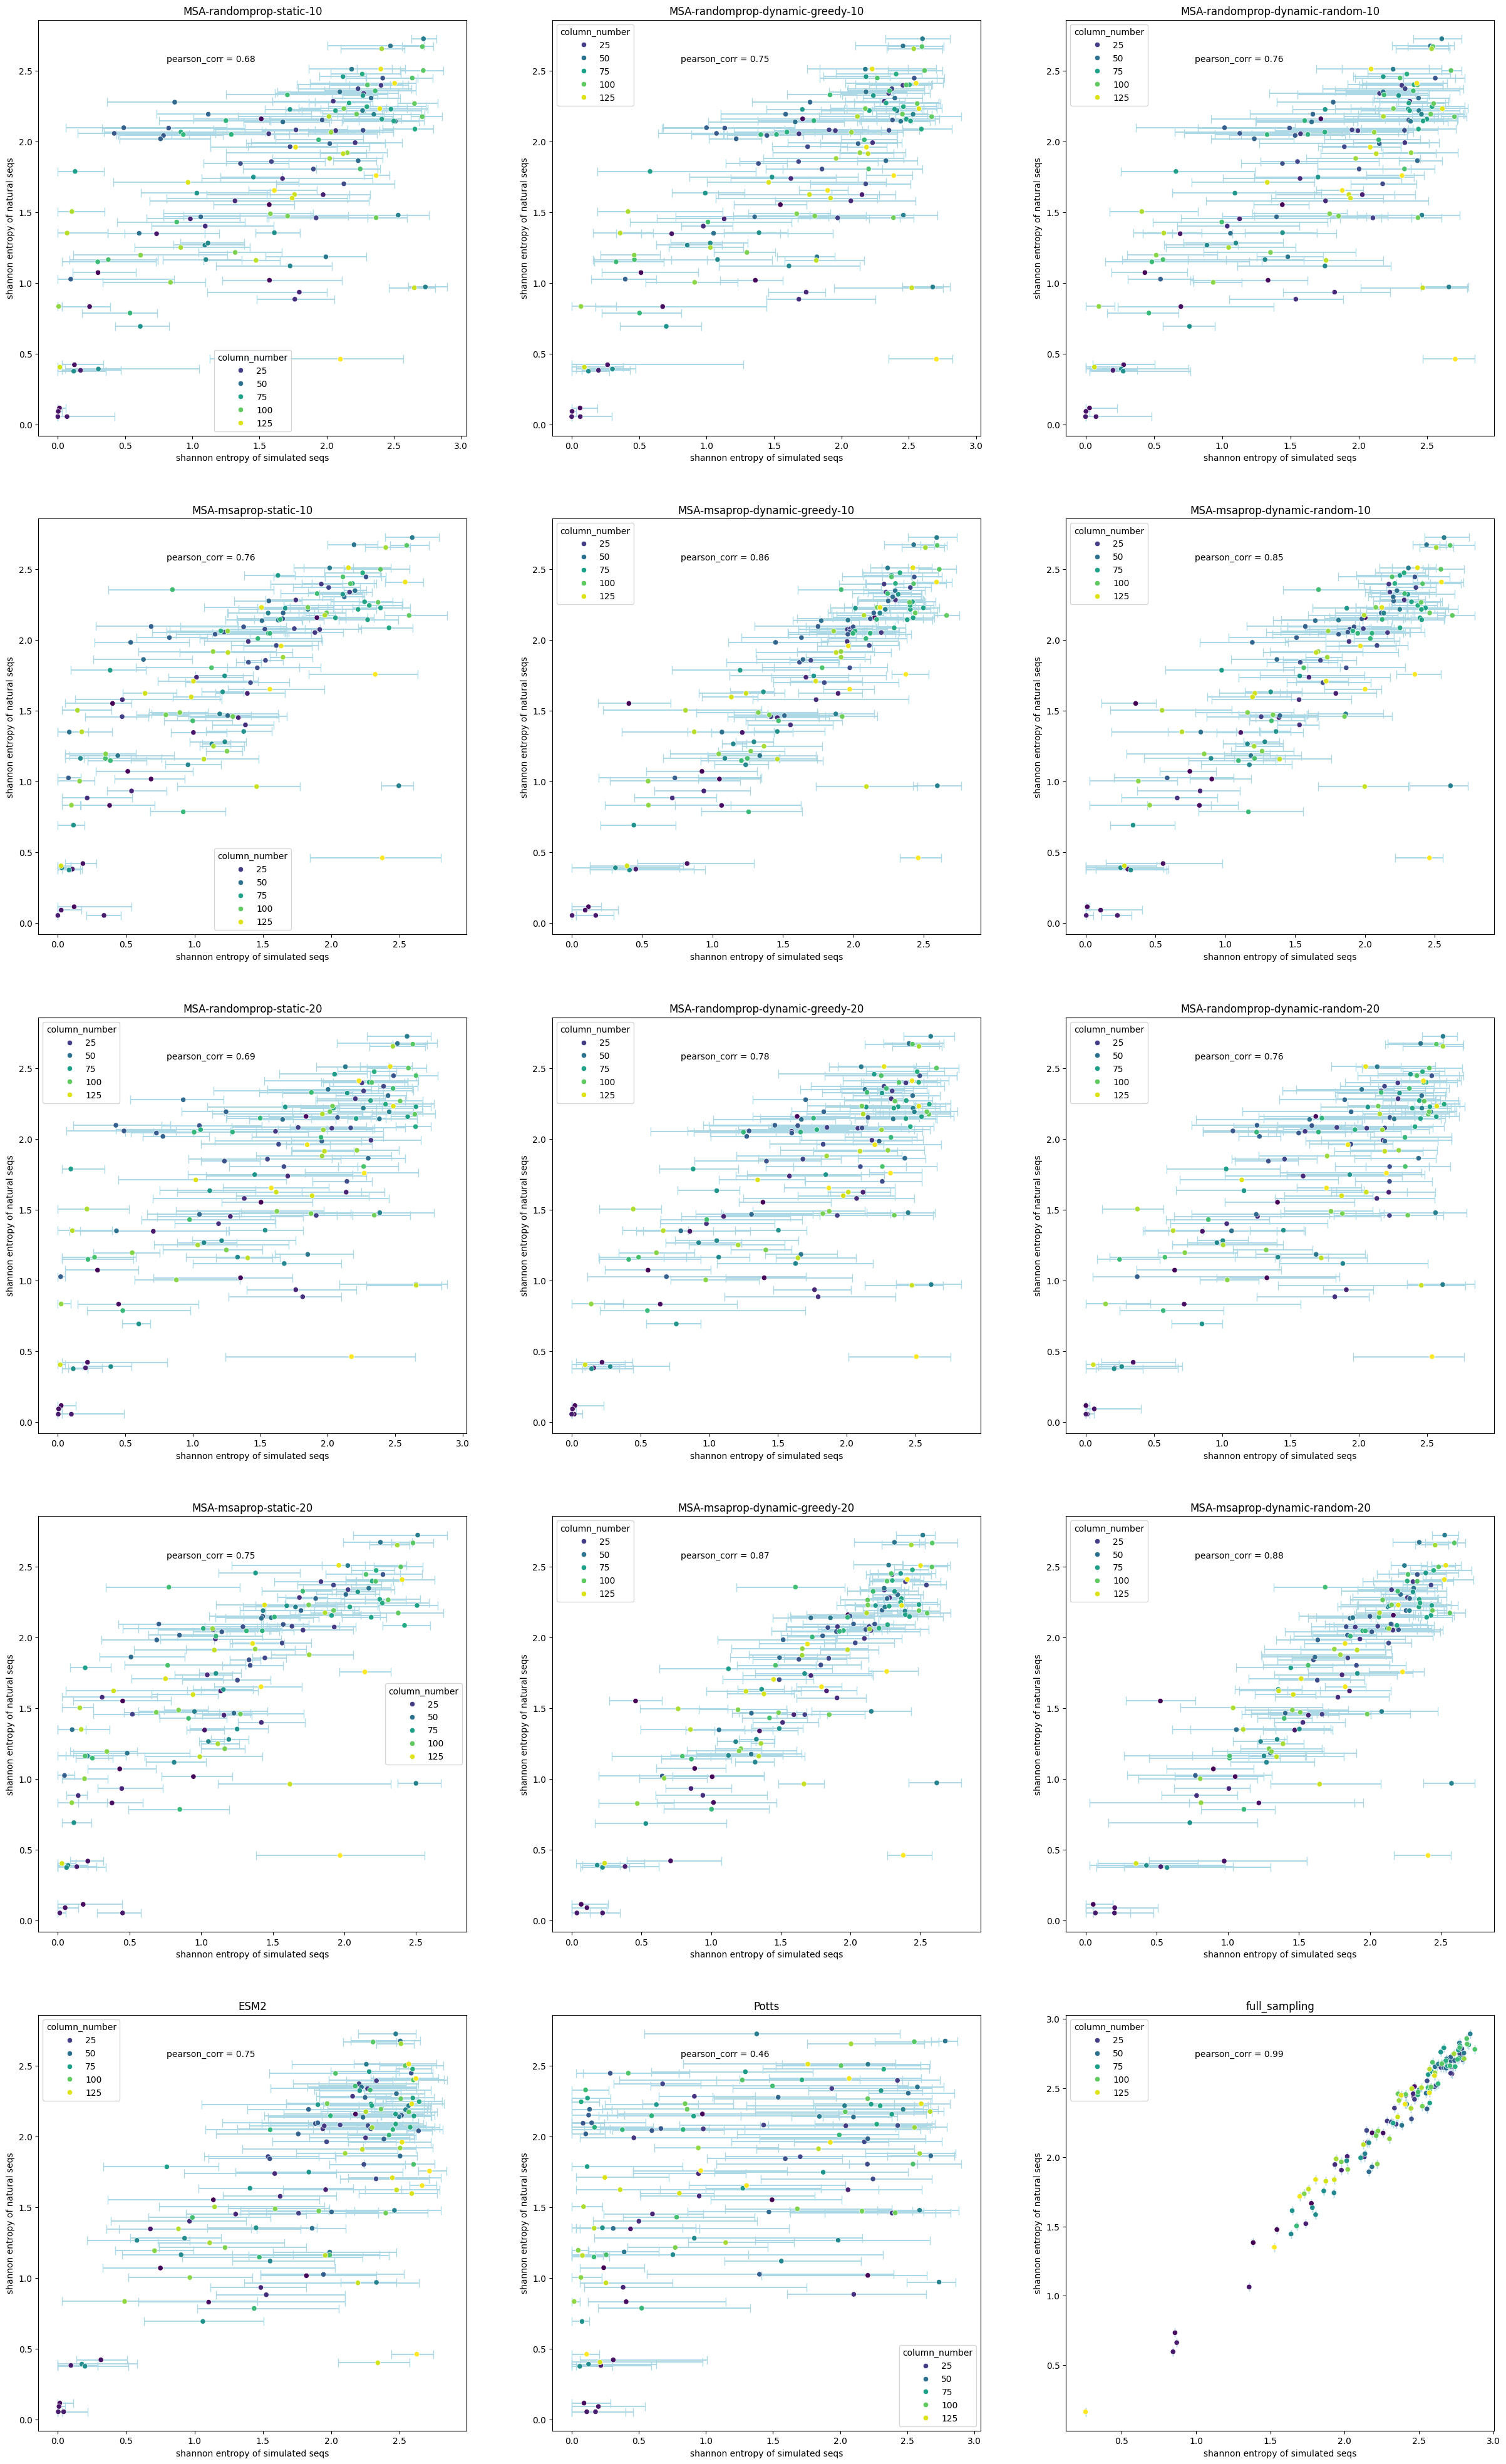

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil
import seaborn as sns

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3

     
    
    main_dataframe_tool_sim_stats = se_dataframe_stats.loc[(se_dataframe_stats["tool"] == tool_types[k]), :]

    xerr_min = main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"] - main_dataframe_tool_sim_stats["shannon_entropy_sim_min"]
    xerr_max = main_dataframe_tool_sim_stats["shannon_entropy_sim_max"] - main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"]
    std_dev = main_dataframe_tool_sim_stats["shannon_entropy_sim_std"].copy()

    axes[i][j].errorbar(main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"], main_dataframe_tool_sim_stats["shannon_entropy_corr_nat"],
                      xerr = [xerr_min,xerr_max], fmt = "none", ecolor = "lightblue",  capsize = 5, zorder = 1)
    
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("shannon entropy of simulated seqs")
    axes[i][j].set_ylabel("shannon entropy of natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim_stats["shannon_entropy_sim_mean"], main_dataframe_tool_sim_stats["shannon_entropy_corr_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.3,0.9), xycoords = "axes fraction")

    sns.scatterplot(x = "shannon_entropy_sim_mean", y = "shannon_entropy_corr_nat", 
                               data = main_dataframe_tool_sim_stats, hue = "column_number", palette = "viridis", ax=axes[i][j], alpha = 1)

plt.savefig("shannon_entropy_scatterplots_error_bars.png")

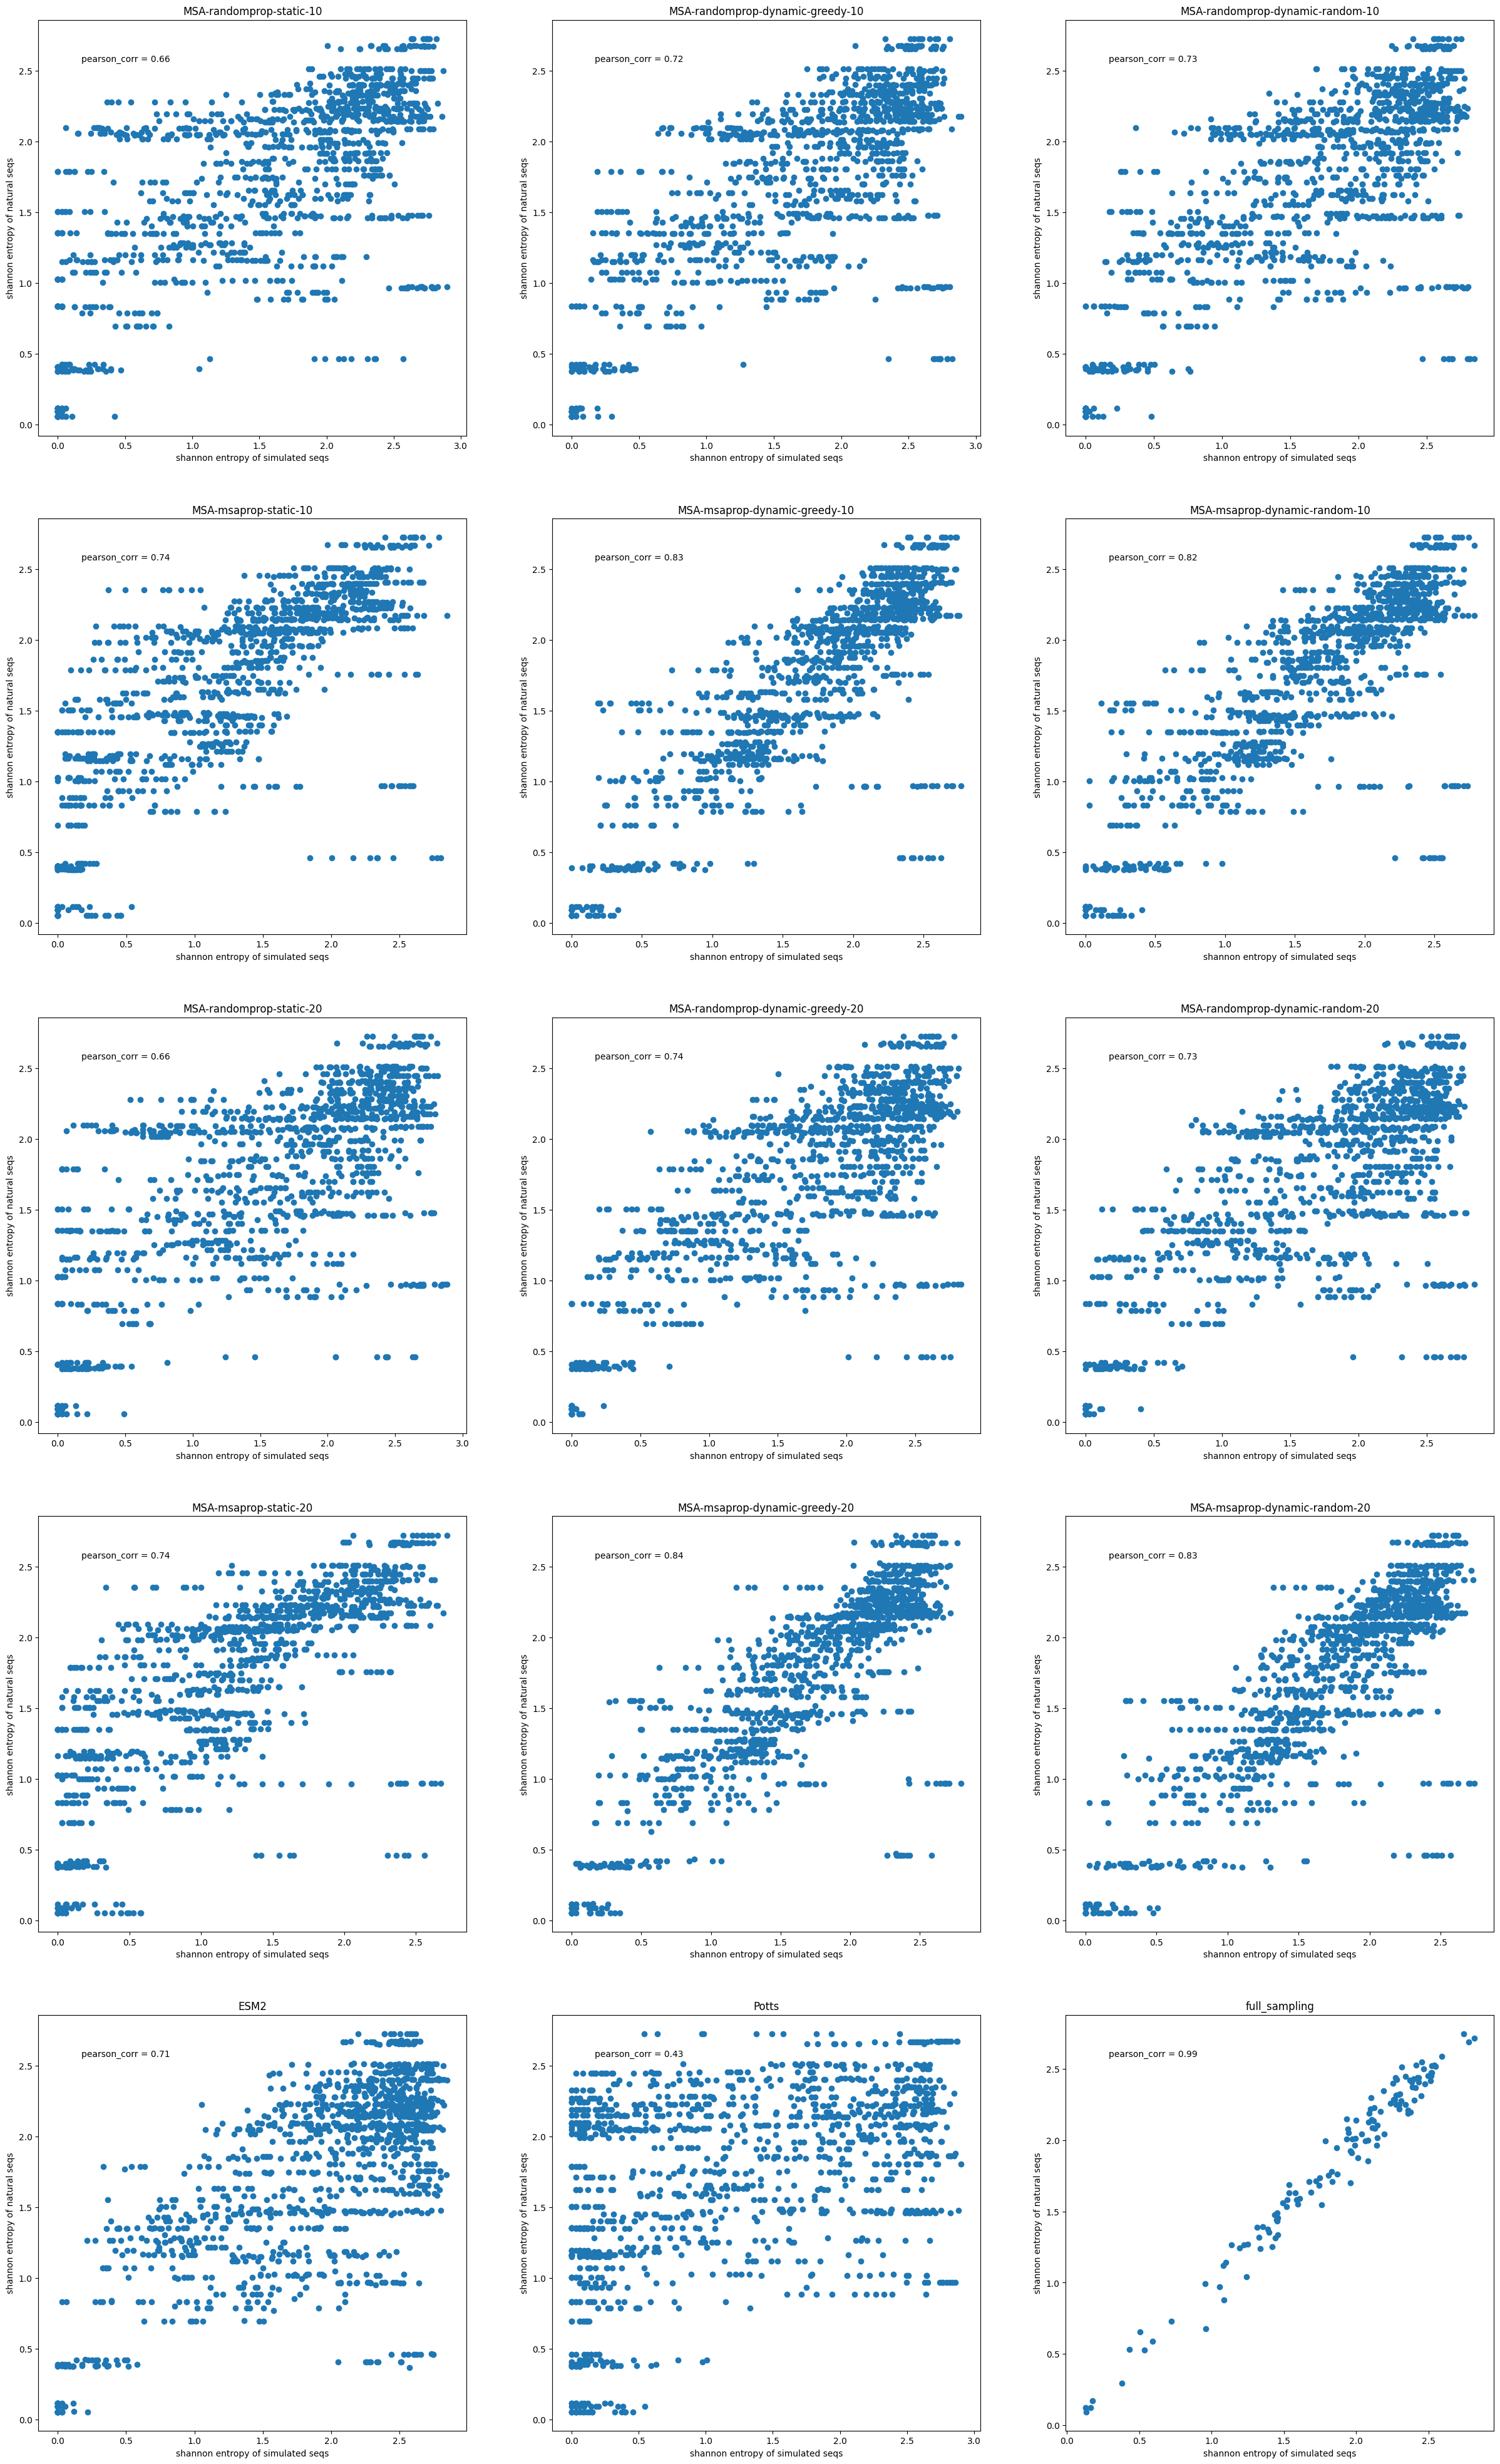

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
# sim_ind = 2

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = se_dataframe.loc[(se_dataframe["tool"] == tool_types[k]), :]
    axes[i][j].scatter(main_dataframe_tool_sim["shannon_entropy_sim"], main_dataframe_tool_sim["shannon_entropy_corr_nat"])
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("shannon entropy of simulated seqs")
    axes[i][j].set_ylabel("shannon entropy of natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim["shannon_entropy_sim"], main_dataframe_tool_sim["shannon_entropy_corr_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

    # values = np.vstack([main_dataframe_tool_sim["shannon_entropy_sim"], main_dataframe_tool_sim["shannon_entropy_corr_nat"])
    # kernel = stats.gaussian_kde(values)(values)
    # sns.scatterplot(
    #     data=tips,
    #     x="shannon_entropy_sim",
    #     y="shannon_entropy_corr_nat",
    #     # c=kernel,
    #     cmap="viridis",
    #     ax=axes[i][j],
    # )

    

plt.savefig("shannon_entropy_scatterplots.png")

## Mutual Information

In [21]:
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from tqdm.notebook import tqdm, trange

mi_dataframe = pd.DataFrame(columns=["tool","sim_ind","column_number","mi_sim","mi_corr_nat"])
sim_ind = 4

for j,folder in enumerate(scores_folders):

    files_list = os.listdir(folder)
    
    for i,file in tqdm(enumerate(files_list)):

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = sim_ind

        if tool_types[j] == "nat":
            continue
        
        if file_sim_ind != sim_ind:
            continue
            
        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        
        sim_array = pd.DataFrame([list(seq) for seq in df["sequence"]]) 
        nat_array = pd.DataFrame([list(seq) for seq in df["corr_nat_seq"]])

        mi_df = []

        for k in range(sim_array.shape[1]):

            for l in range(k + 1, sim_array.shape[1]):

                mi_sim = mutual_info_score(list(sim_array.iloc[:,k]),list(sim_array.iloc[:,l]))
                mi_nat = mutual_info_score(list(nat_array.iloc[:,k]),list(nat_array.iloc[:,l]))
    
                mi_df.append({"tool":tool_types[j],"sim_ind": file_sim_ind, "column_numbers": (k + 1, l +1), 
                                   "mi_sim":mi_sim,"mi_nat": mi_nat}) 

        mi_df = pd.DataFrame(mi_df) 

        mi_dataframe = pd.concat((mi_dataframe, mi_df)).reset_index(drop=True)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

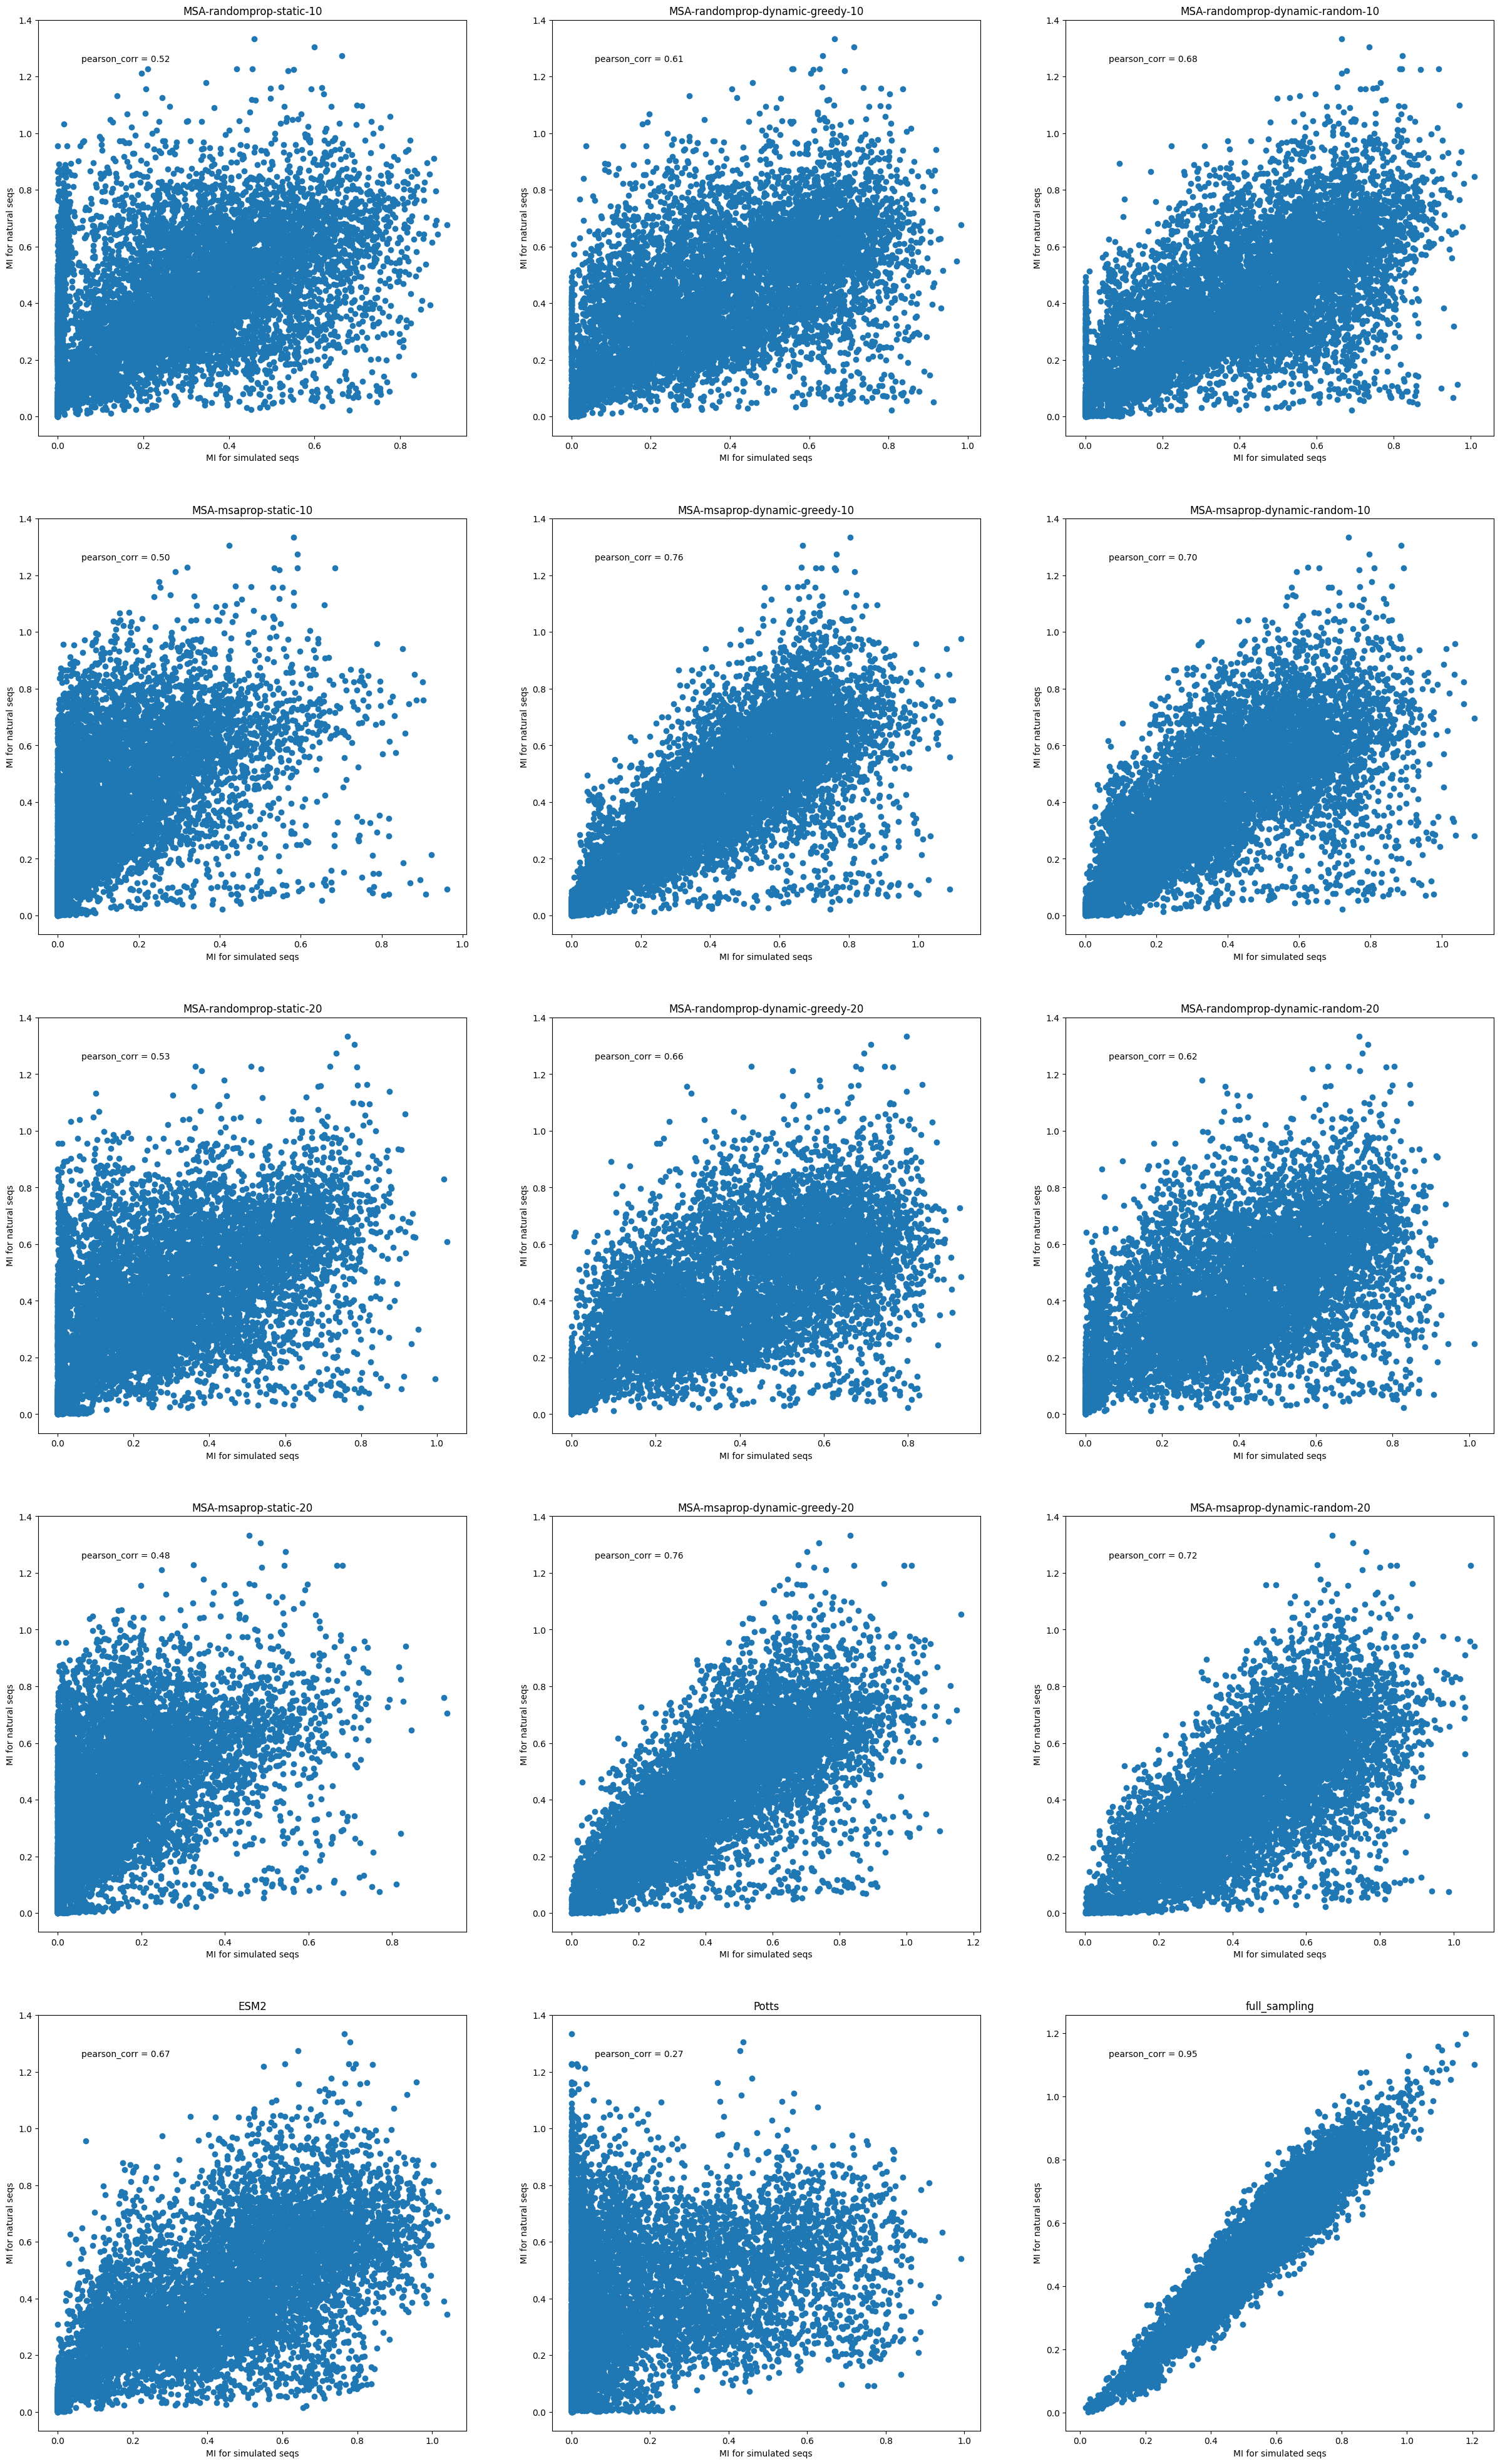

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
# sim_ind = 1

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = mi_dataframe.loc[(mi_dataframe["tool"] == tool_types[k]) , :]
    axes[i][j].scatter(main_dataframe_tool_sim["mi_sim"], main_dataframe_tool_sim["mi_nat"])
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("MI for simulated seqs")
    axes[i][j].set_ylabel("MI for natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim["mi_sim"], main_dataframe_tool_sim["mi_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

    # values = np.vstack([main_dataframe_tool_sim["mi_sim"], main_dataframe_tool_sim["mi_nat"]])
    # kernel = stats.gaussian_kde(values)(values)
    # sns.scatterplot(
    #     data=tips,
    #     x="mi_sim",
    #     y="mi_nat",
    #     c=kernel,
    #     cmap="viridis",
    #     ax=axes[i][j],
    # )

plt.savefig(f"MI_scatterplots_sim_{sim_ind}.png")

## Hamming Distance Between Tree Leaves Comparison  (Simulated vs Natural)

In [24]:
hd_dataframe = pd.DataFrame(columns=["tool","sim_ind","ham_dist_sim","ham_dist_corr_nat"])

for j,folder in enumerate(scores_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] == "nat" and file == "PF00004_seed.fasta":
            continue

        if tool_types[j] != "nat" and tool_types[j] != "full_sampling":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1
            
        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        
        num_sim_array = np.array([list(seq) for seq in df["sequence"]], dtype=np.bytes_).view(np.uint8)
        
        distance_matrix_sim = cdist(num_sim_array,num_sim_array, "hamming")
        pairwise_distances_sim = distance_matrix_sim[np.triu_indices_from(distance_matrix_sim, k=1)]

        num_nat_array = np.array([list(seq) for seq in df["corr_nat_seq"]], dtype=np.bytes_).view(np.uint8)
        
        distance_matrix_nat = cdist(num_nat_array,num_nat_array, "hamming")
        pairwise_distances_nat = distance_matrix_nat[np.triu_indices_from(distance_matrix_nat, k=1)]

        dist_dataframe["ham_dist_sim"] = list(pairwise_distances_sim)
        dist_dataframe["ham_dist_corr_nat"] = list(pairwise_distances_nat)
        dist_dataframe["tool"] = tool_types[j]
        dist_dataframe["sim_ind"] = file_sim_ind

        hd_dataframe = pd.concat((hd_dataframe, dist_dataframe)).reset_index(drop=True)

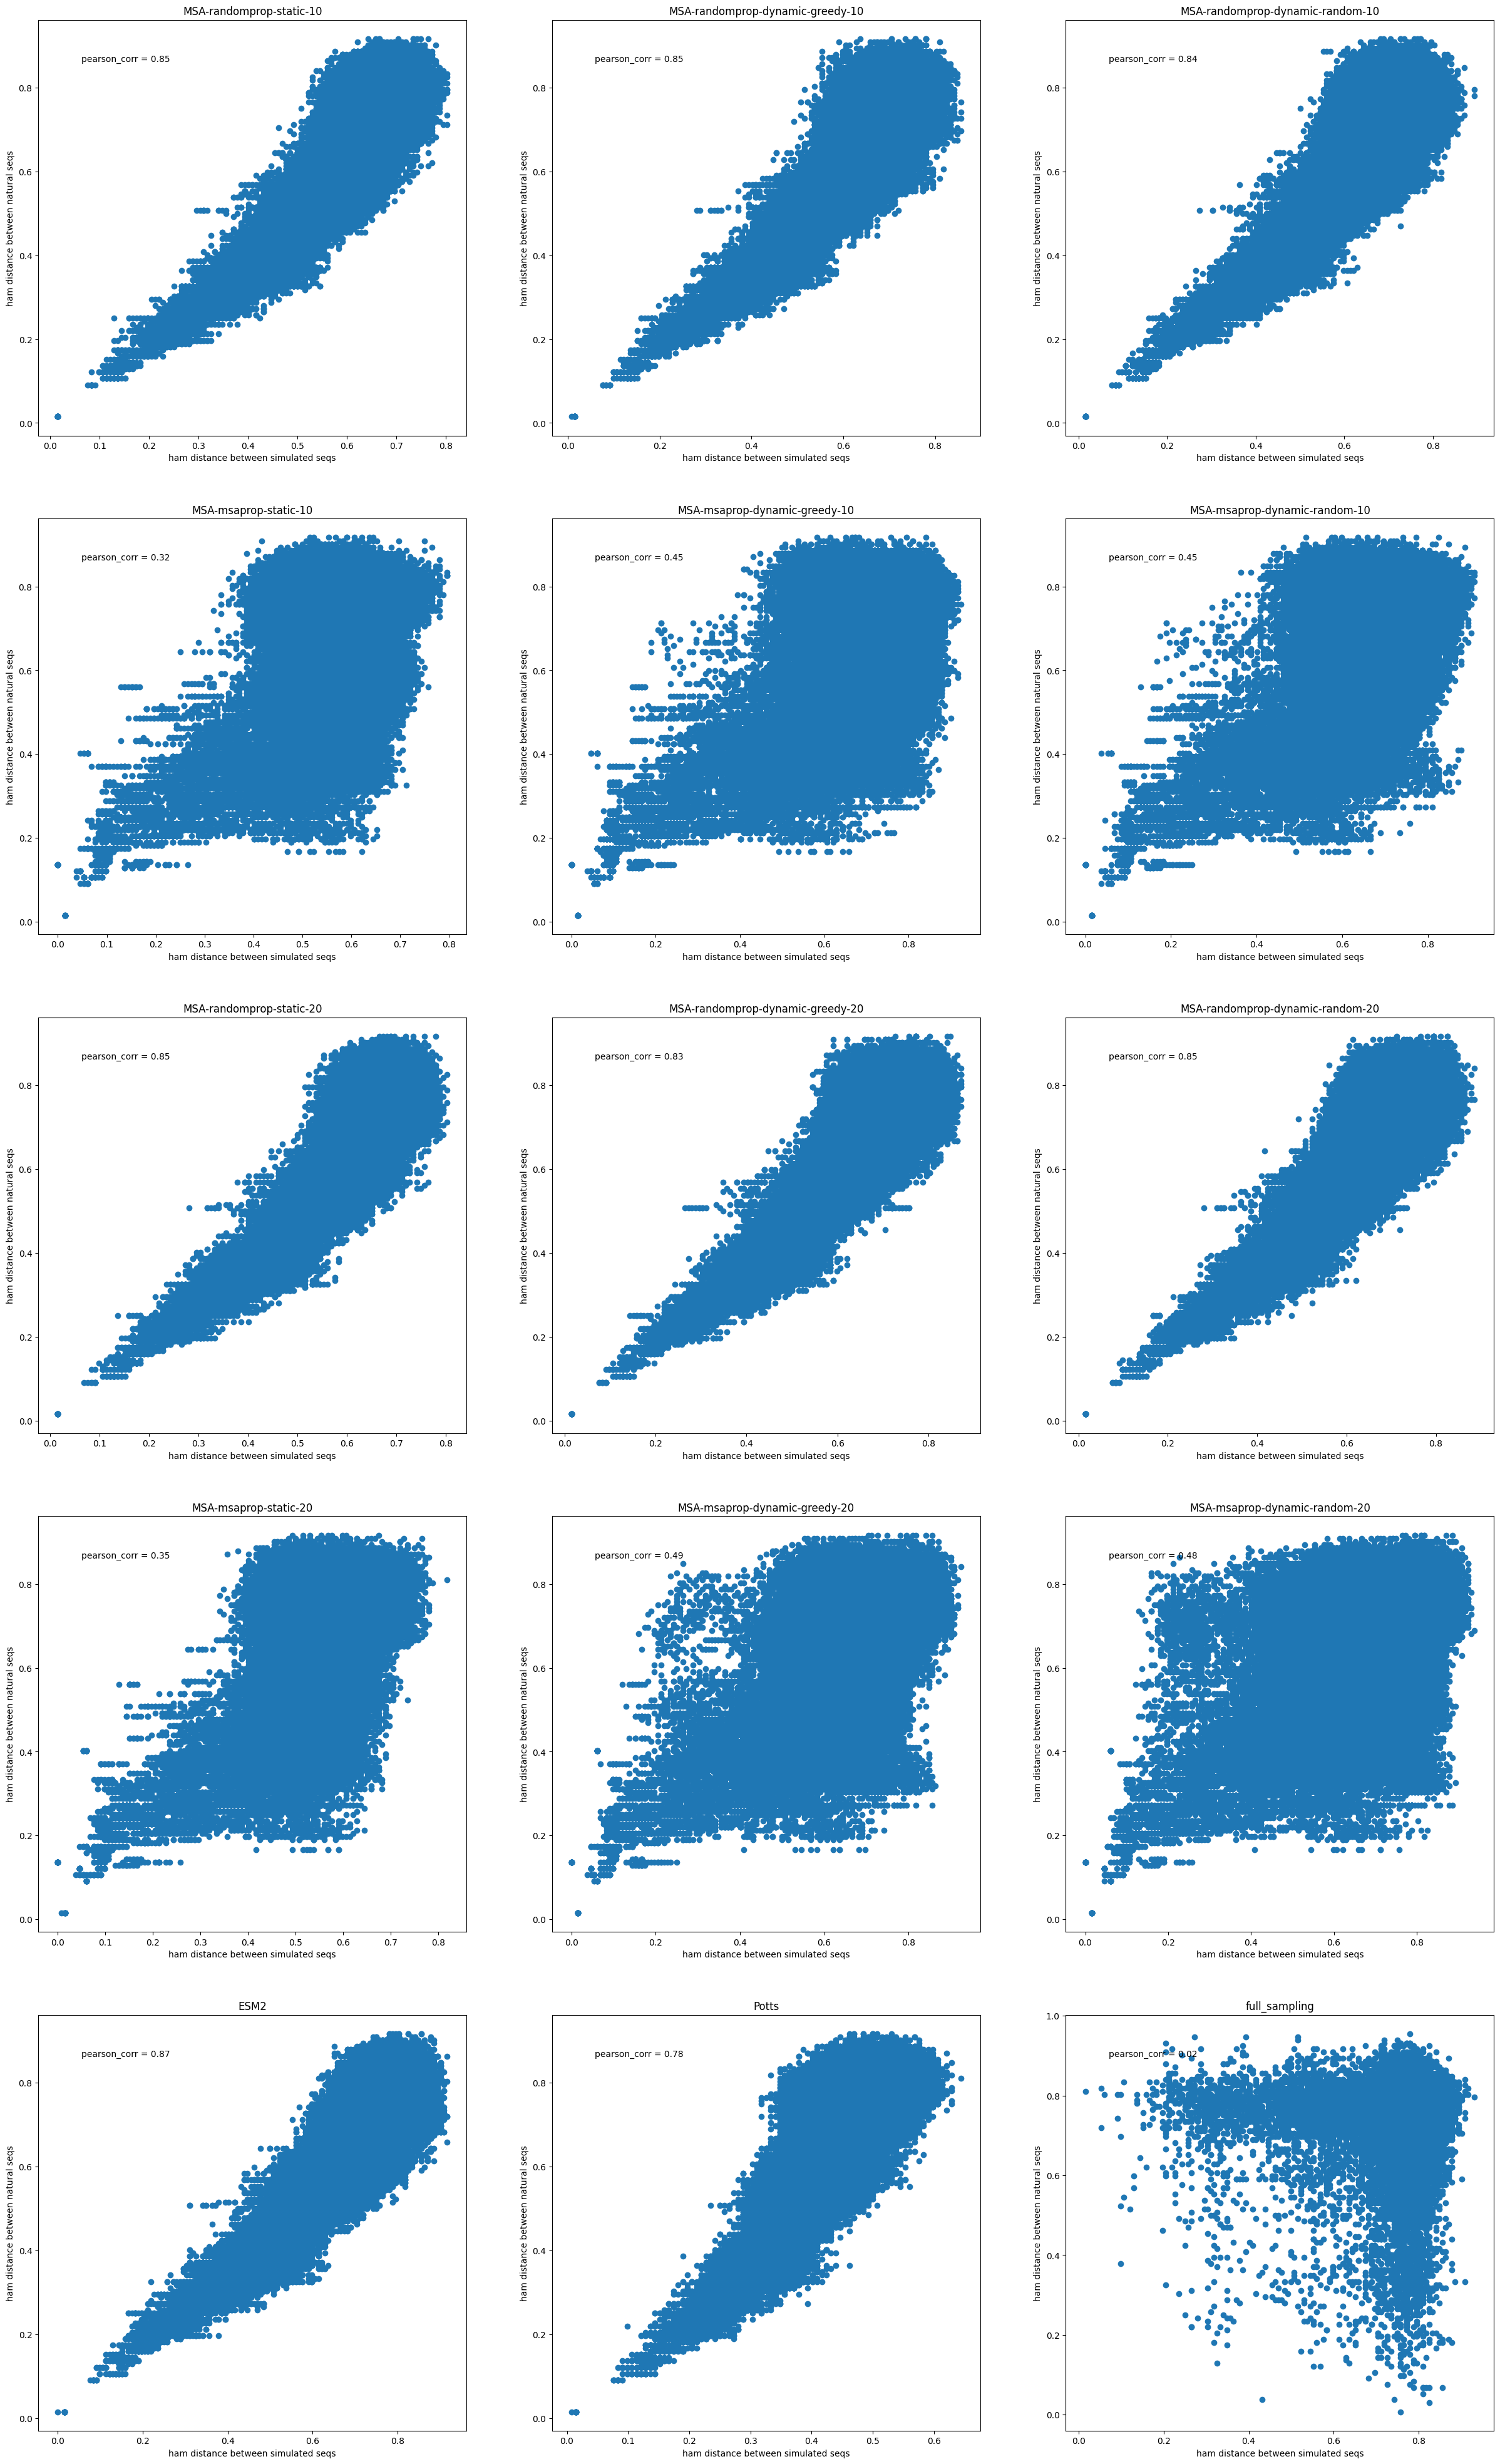

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil
from scipy import stats


fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
sim_ind = 1

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = hd_dataframe.loc[(hd_dataframe["tool"] == tool_types[k]), :]
    axes[i][j].scatter(main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"])
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("ham distance between simulated seqs")
    axes[i][j].set_ylabel("ham distance between natural seqs")
    pearson_corr = pearsonr(main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"])
    axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

    # values = np.vstack([main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"]])
    # kernel = stats.gaussian_kde(values)(values)
    # sns.scatterplot(
    #     data=main_dataframe_tool_sim,
    #     x="ham_dist_sim",
    #     y="ham_dist_corr_nat",
    #     ax=axes[i][j],
    # )

    # sns.kdeplot(
    #     data=main_dataframe_tool_sim,
    #     x="ham_dist_sim",
    #     y="ham_dist_corr_nat",
    #     levels=5,
    #     fill=True,
    #     alpha=0.6,
    #     cut=2,
    #     ax=axes[i][j],
    # )

plt.savefig("ham_distances_scatterplots.png")

## Hamming Distance Distributions

In [21]:
hd_dist_dataframe = pd.DataFrame(columns=["tool","sim_ind","ham_dist"])

for j,folder in enumerate(scores_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1

        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t") 
        num_seq_array = np.array([list(seq) for seq in df["sequence"]], dtype=np.bytes_).view(np.uint8)
        
        distance_matrix = cdist(num_seq_array,num_seq_array, "hamming")
        pairwise_distances = np.triu(distance_matrix).flatten()
        mask = pairwise_distances != 0
        pairwise_distances = pairwise_distances[mask]

        dist_dataframe["ham_dist"] = list(pairwise_distances)
        dist_dataframe["tool"] = tool_types[j]
        dist_dataframe["sim_ind"] = file_sim_ind

        main_dataframe = pd.concat((main_dataframe, dist_dataframe))

tool sim_ind  ham_dist
0      MSA-randomprop-static-10       1  0.128788
1      MSA-randomprop-static-10       1  0.333333
2      MSA-randomprop-static-10       1  0.227273
3      MSA-randomprop-static-10       1  0.234848
4      MSA-randomprop-static-10       1  0.606061
...                         ...     ...       ...
21316                       nat       1  0.689394
21317                       nat       1  0.772727
21318                       nat       1  0.863636
21319                       nat       1  0.848485
21320                       nat       1  0.734848

[2364539 rows x 3 columns]

In [18]:
sim_number = 1

hd_dist_dataframe.loc[hd_dist_dataframe["tool"] == "nat","sim_ind"] = sim_number
hd_dist_dataframe_one_sim = main_dataframe.loc[main_dataframe["sim_ind"] == sim_number, :]

fig = px.violin(main_dataframe_one_sim, y="ham_dist", x="tool",color = "sim_ind", box = True, points = False)
fig.show()

## Contact Prediction Analysis

In [82]:
from typing import List, Tuple, Optional, Dict, NamedTuple, Union, Callable
import itertools
import os
import string
from pathlib import Path

import numpy as np
import torch
from scipy.spatial.distance import squareform, pdist, cdist
import matplotlib.pyplot as plt
import matplotlib as mpl
from Bio import SeqIO
import biotite.structure as bs
from biotite.structure.io.pdbx import PDBxFile, get_structure
from biotite.database import rcsb
from tqdm import tqdm
import pandas as pd

import esm

torch.set_grad_enabled(False)

def plot_contacts_and_predictions(
    predictions: Union[torch.Tensor, np.ndarray],
    contacts: Union[torch.Tensor, np.ndarray],
    ax: Optional[mpl.axes.Axes] = None,
    # artists: Optional[ContactAndPredictionArtists] = None,
    cmap: str = "Blues",
    ms: float = 1,
    title: Union[bool, str, Callable[[float], str]] = True,
    animated: bool = False,
) -> None:

    if isinstance(predictions, torch.Tensor):
        predictions = predictions.detach().cpu().numpy()
    if isinstance(contacts, torch.Tensor):
        contacts = contacts.detach().cpu().numpy()
    if ax is None:
        ax = plt.gca()

    seqlen = contacts.shape[0]
    relative_distance = np.add.outer(-np.arange(seqlen), np.arange(seqlen))
    bottom_mask = relative_distance < 0
    masked_image = np.ma.masked_where(bottom_mask, predictions)
    invalid_mask = np.abs(np.add.outer(np.arange(seqlen), -np.arange(seqlen))) < 6
    
    predictions = predictions.copy()
    predictions[invalid_mask] = float("-inf")
    topl_val_pred = np.sort(predictions.reshape(-1))[-seqlen]
    pred_contacts = predictions >= topl_val_pred

    contacts = contacts.copy()
    contacts[invalid_mask] = float("-inf")
    topl_val_contacts = np.sort(contacts.reshape(-1))[-seqlen]
    contacts = contacts >= topl_val_contacts

    contacts = np.ma.masked_where(bottom_mask, contacts)
    
    true_positives = contacts & pred_contacts & ~bottom_mask
    false_positives = ~contacts & pred_contacts & ~bottom_mask
    other_contacts = contacts & ~pred_contacts & ~bottom_mask

    if isinstance(title, str):
        title_text: Optional[str] = title
    elif title:
        long_range_pl = compute_precisions(predictions, contacts, minsep=24)[
            "P@L"
        ].item()
        if callable(title):
            title_text = title(long_range_pl)
        else:
            title_text = f"Long Range P@L: {100 * long_range_pl:0.1f}"
    else:
        title_text = None

    img = ax.imshow(contacts, cmap=cmap, animated=animated)
    oc = ax.plot(*np.where(other_contacts), "o", c="grey", ms=ms)[0]
    fn = ax.plot(*np.where(false_positives), "o", c="r", ms=ms)[0]
    tp = ax.plot(*np.where(true_positives), "o", c="b", ms=ms)[0]
    ti = ax.set_title(title_text) if title_text is not None else None
    # artists = ContactAndPredictionArtists(img, oc, fn, tp, ti)

    ax.axis("square")
    ax.set_xlim([0, seqlen])
    ax.set_ylim([0, seqlen])


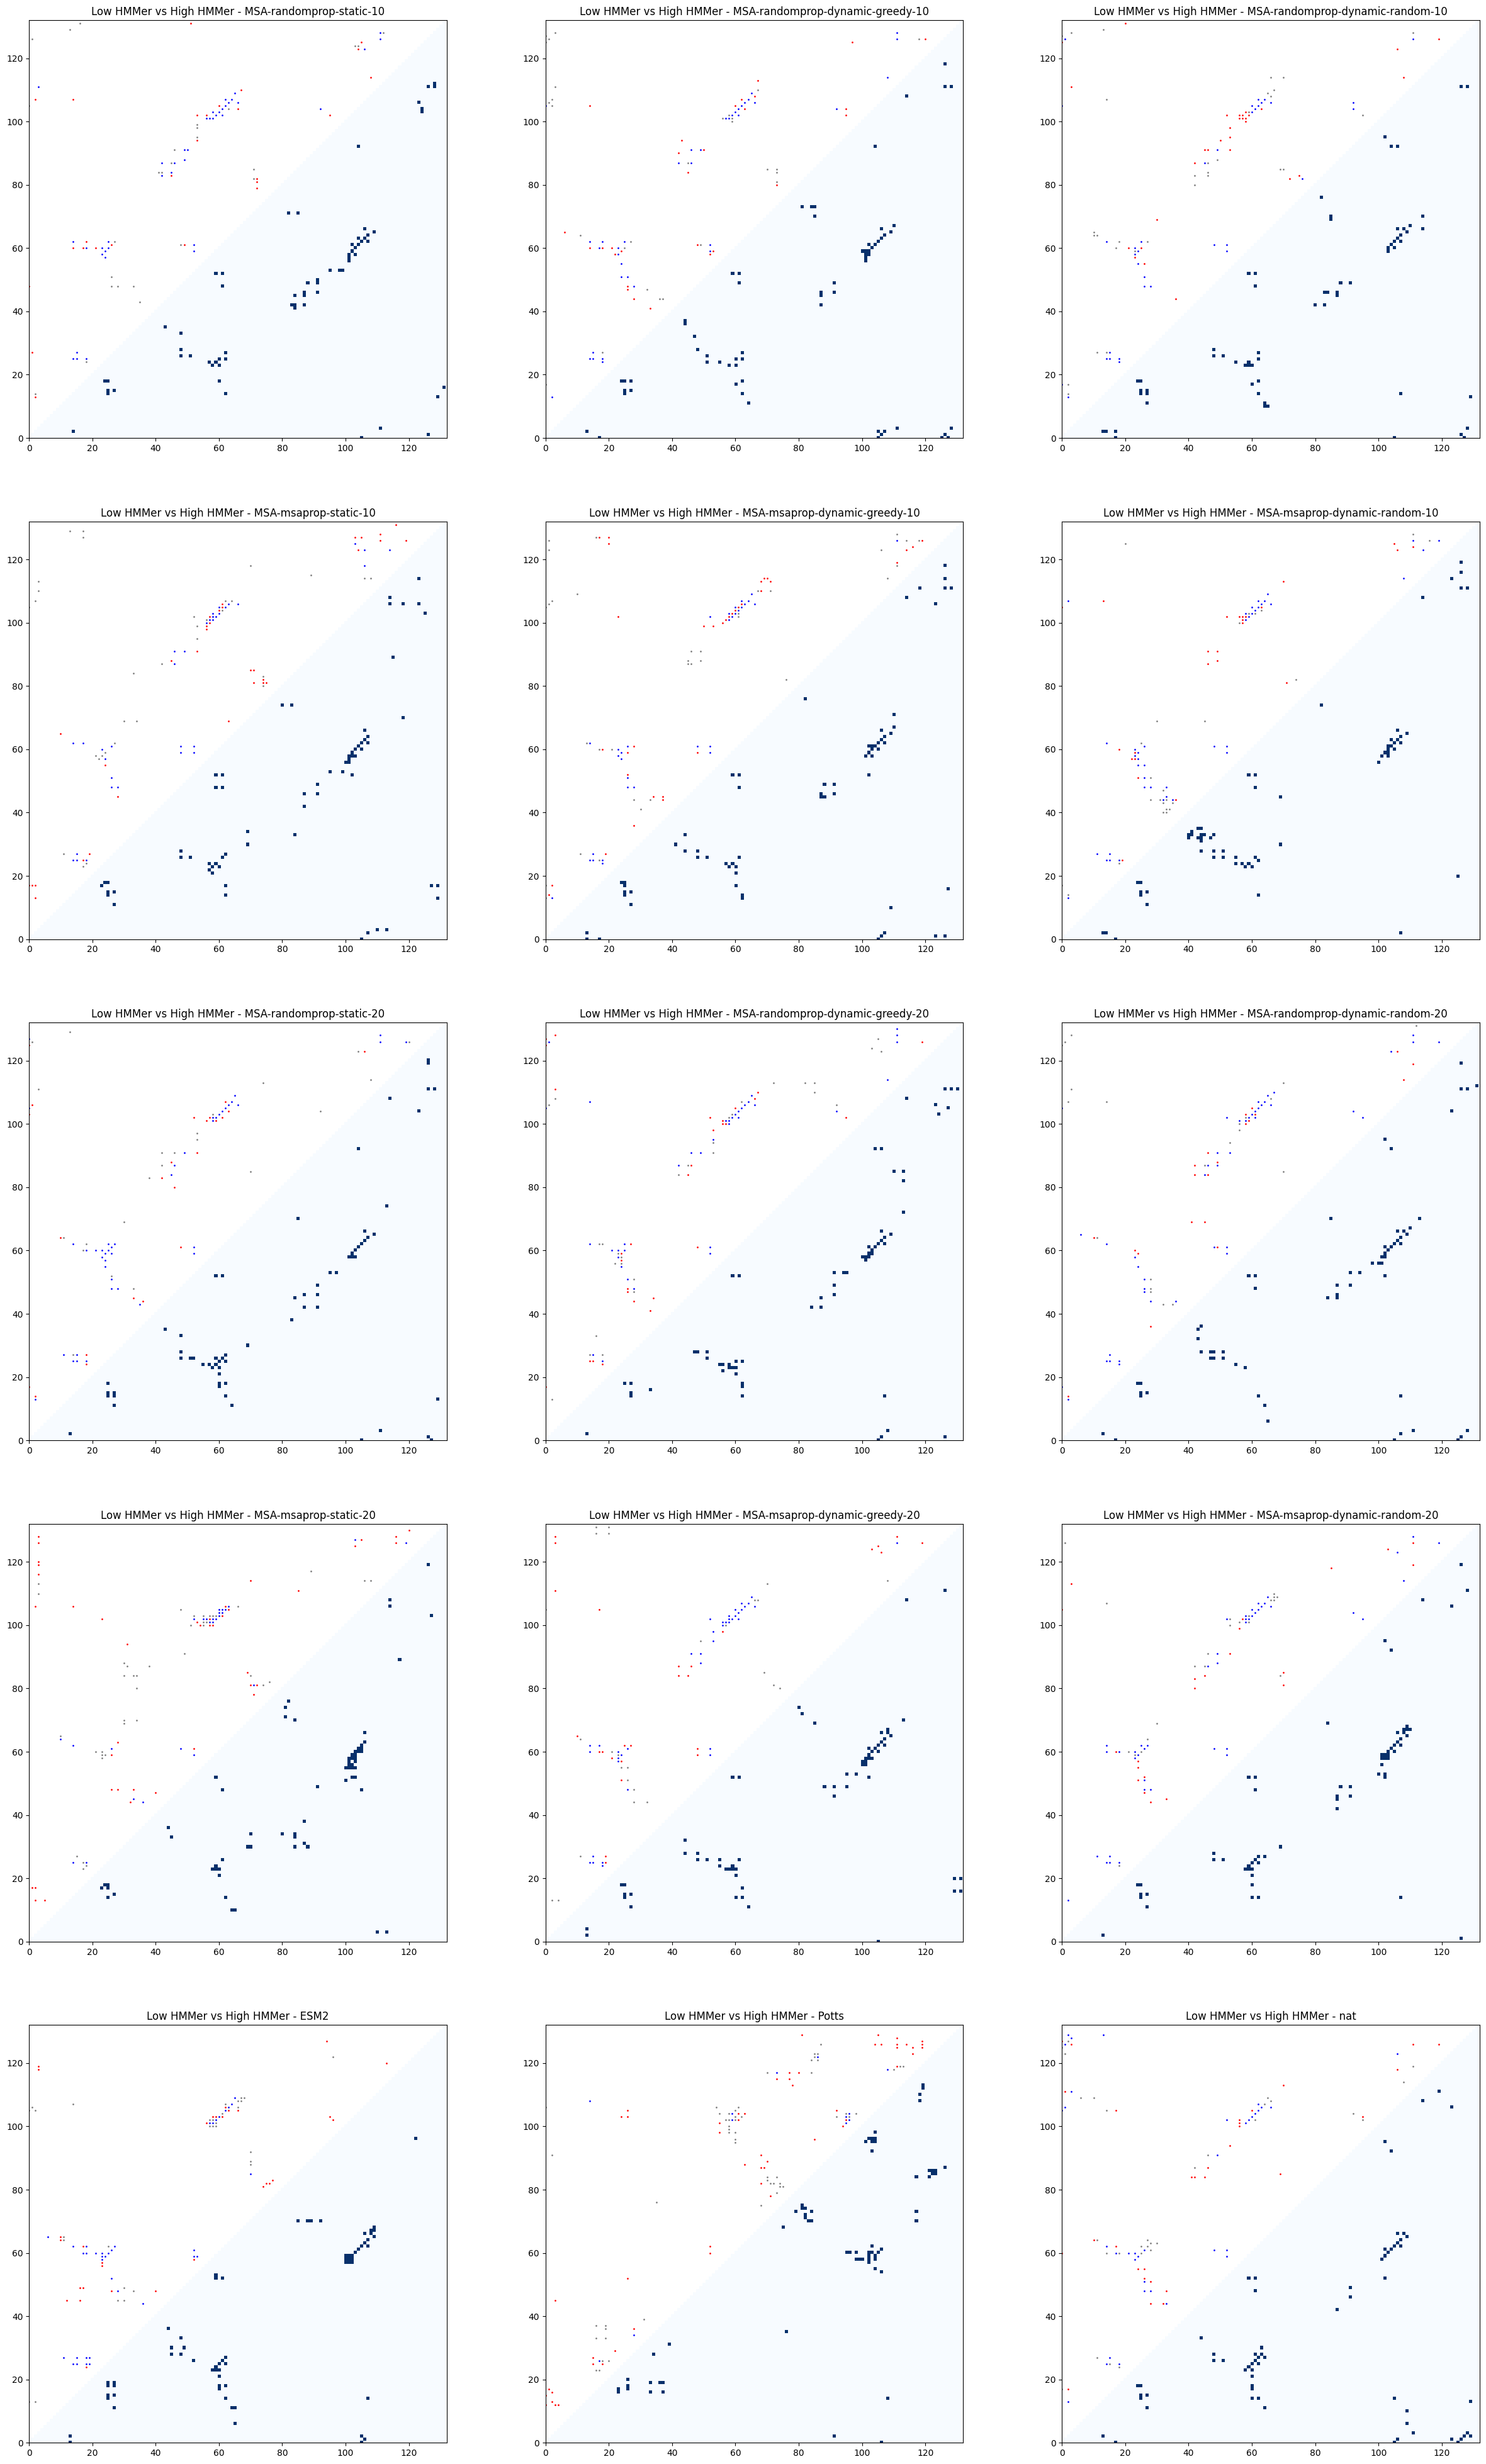

In [83]:
import esm
import torch
import matplotlib.pyplot as plt

hmmer_score_cutoff_percentile = 0.5

msa_transformer, msa_transformer_alphabet = esm.pretrained.esm_msa1b_t12_100M_UR50S()
msa_transformer = msa_transformer.eval().cuda()
msa_transformer_batch_converter = msa_transformer_alphabet.get_batch_converter()

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))

for j,folder in enumerate(scores_folders):

    r = floor(j/3)
    c = j % 3
        
    for i,file in enumerate([os.listdir(folder)[0]]):

        torch.cuda.empty_cache()

        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1

        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()
        
        df = pd.read_csv(file_path, delimiter="\t")
        
        hmmer_score_cutoff = np.quantile(df["hmmer_seq_score"], q = hmmer_score_cutoff_percentile, method="midpoint")

        high_hmmer_scores_df = df.loc[df["hmmer_seq_score"] > hmmer_score_cutoff, : ]
        low_hmmer_scores_df = df.loc[df["hmmer_seq_score"] <= hmmer_score_cutoff, : ] 

        high_hmmer_seqs =  [(name, seq) for name,seq in zip(high_hmmer_scores_df["sequence_name"], high_hmmer_scores_df["sequence"])]

        a, b, high_batch_tokens = msa_transformer_batch_converter([high_hmmer_seqs])
        high_batch_tokens = high_batch_tokens.to(next(msa_transformer.parameters()).device)
        msa_transformer_predictions_high = msa_transformer.predict_contacts(high_batch_tokens)[0].cpu()

        del high_batch_tokens
        torch.cuda.empty_cache()

        low_hmmer_seqs = [(name, seq) for name,seq in zip(low_hmmer_scores_df["sequence_name"], low_hmmer_scores_df["sequence"])]
        
        _, _, low_batch_tokens = msa_transformer_batch_converter([low_hmmer_seqs])
        low_batch_tokens = low_batch_tokens.to(next(msa_transformer.parameters()).device)
        msa_transformer_predictions_low = msa_transformer.predict_contacts(low_batch_tokens)[0].cpu()

        del low_batch_tokens
        torch.cuda.empty_cache()

        # fig, axes = plt.subplots(figsize=(18, 6), ncols=)
        prediction = msa_transformer_predictions_high
        target = msa_transformer_predictions_low
        plot_contacts_and_predictions(
            prediction, target, ax=axes[r][c], title = f"Low HMMer vs High HMMer - {tool_types[j]}"
        )

plt.show()

        

## Hamming Distance Matrices (Arranged According to Tree Structure)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './data/msa-seed-simulations/no_phylogeny/500-mutations/50-sequences/msa-seed-simulations/MSA-1b/msa_prob_dist-proposal/context-size-10/PF00004'

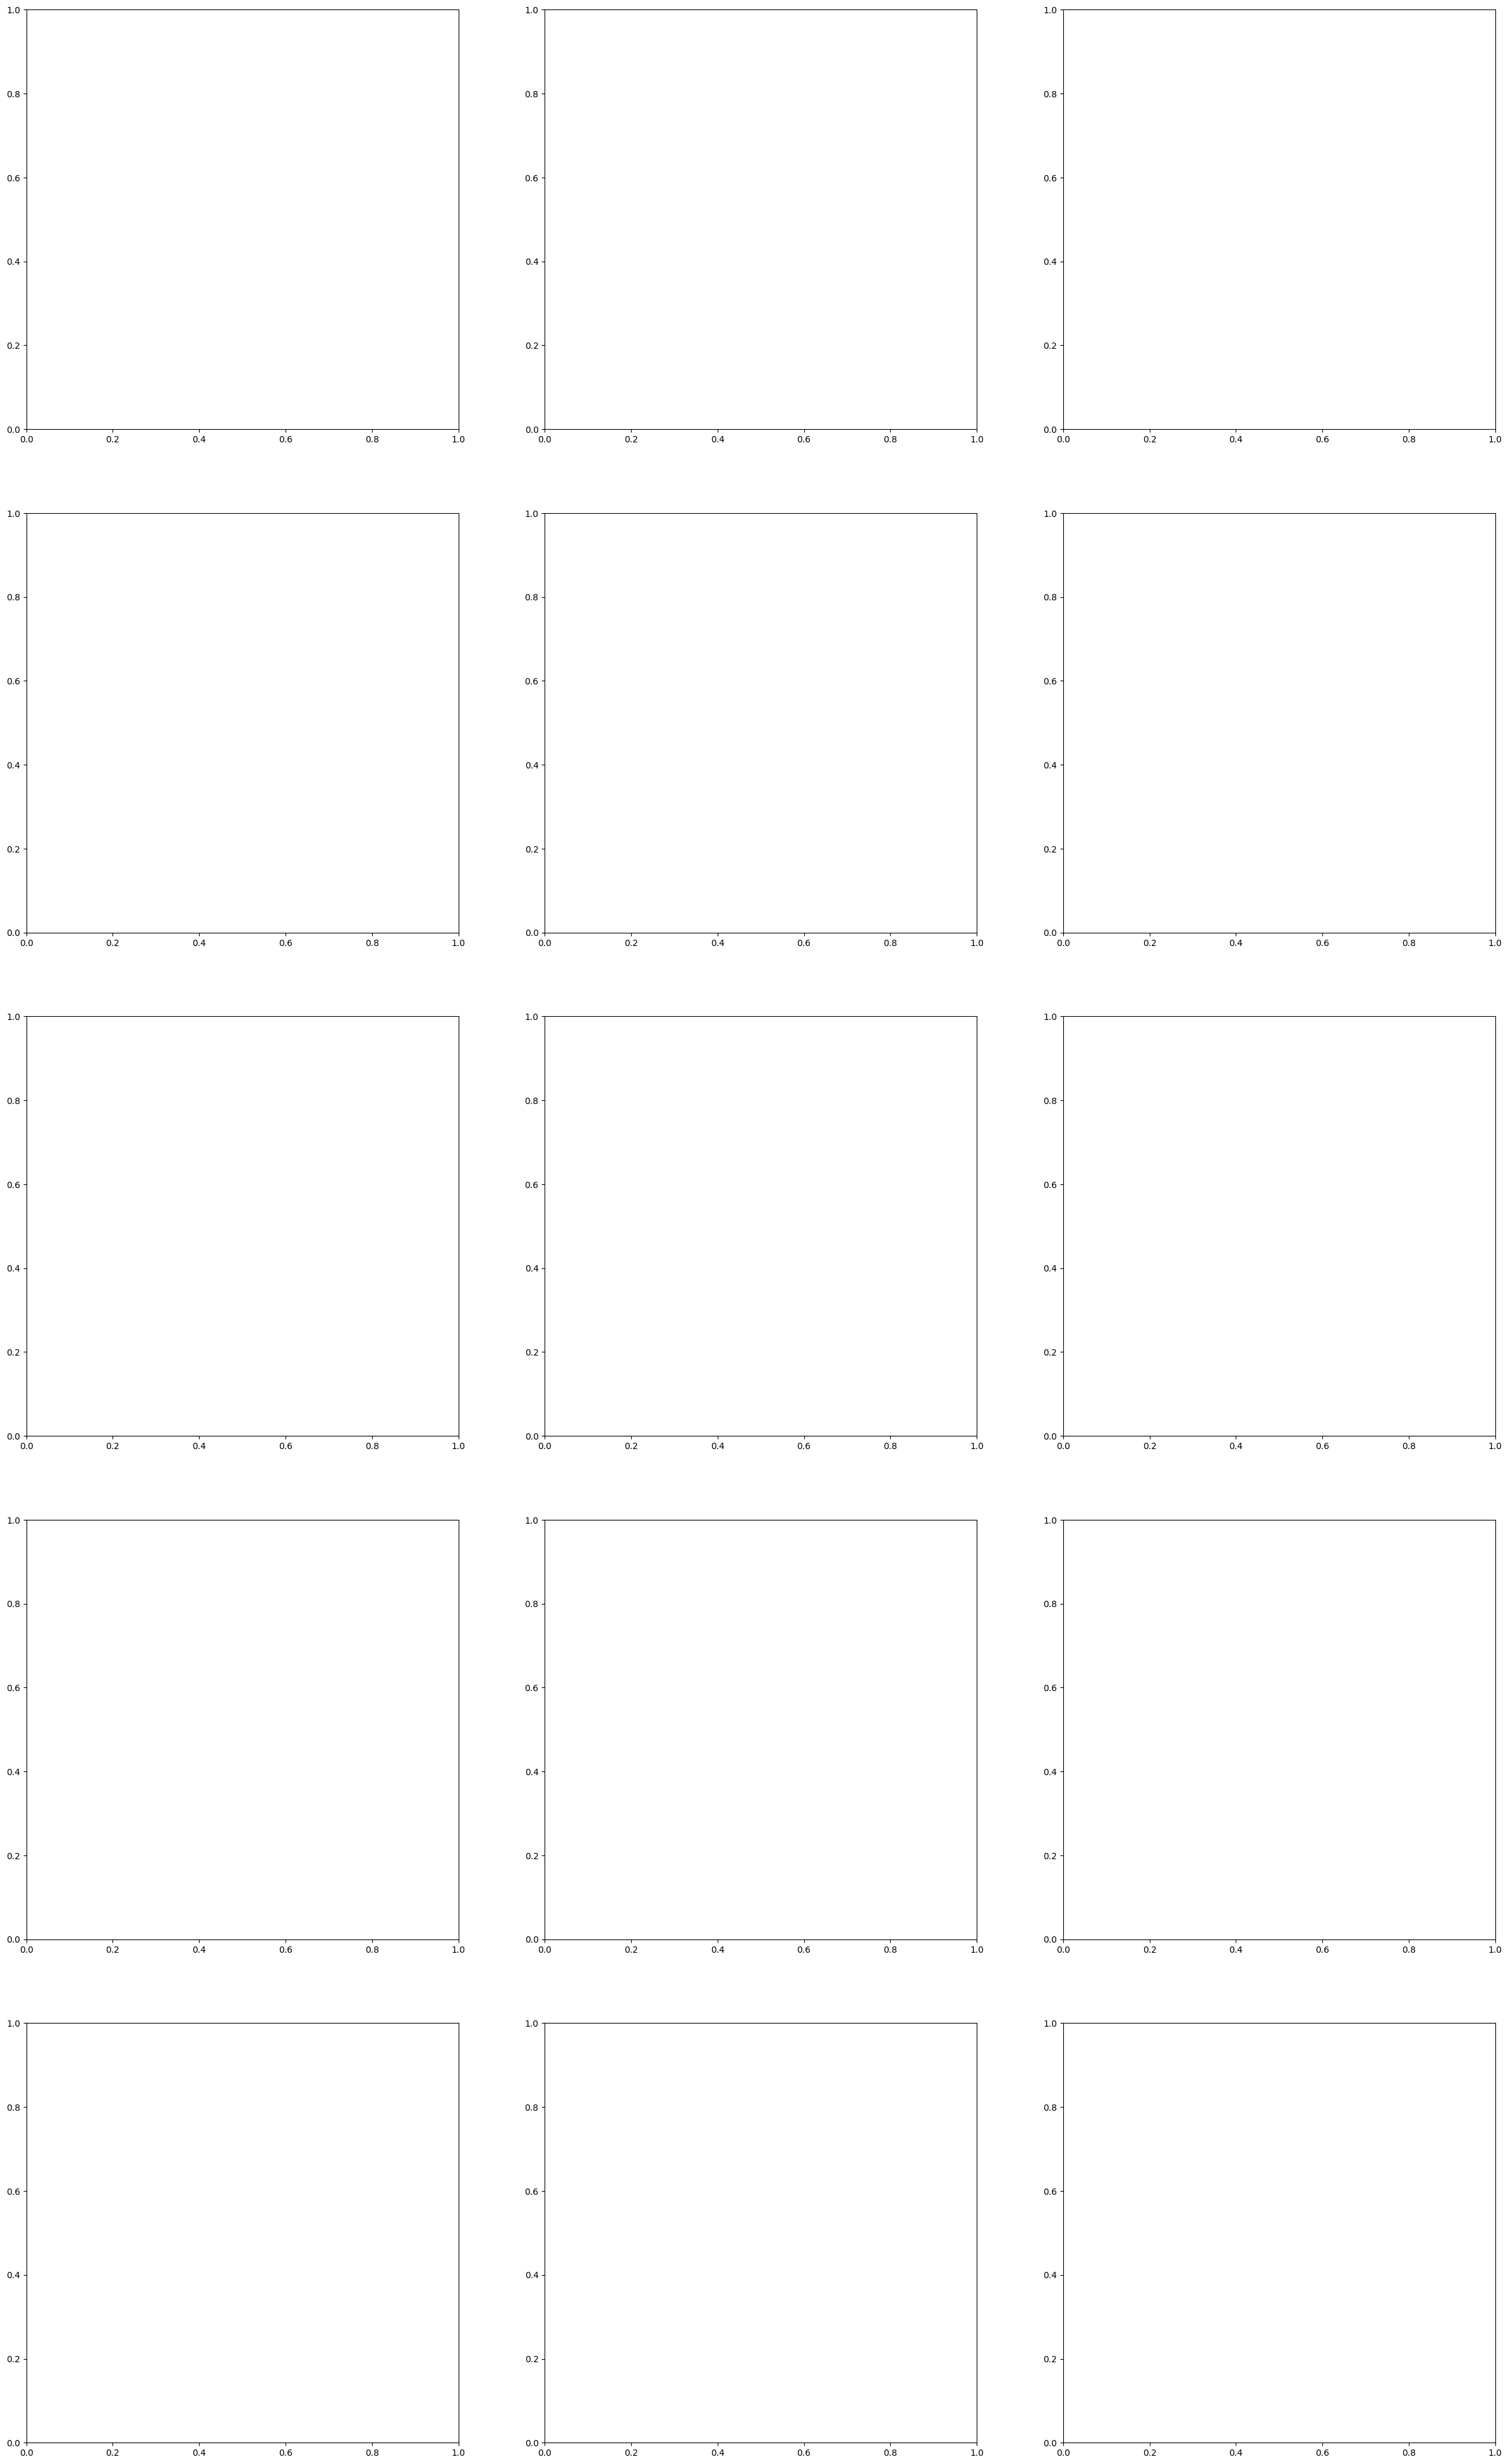

In [24]:
from math import floor,ceil
import matplotlib.pyplot as plt

nat_msa_path = "./data/protein-families-msa-seed/PF00004_seed_ordered.fasta"

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
sim_ind = 1

for j,folder in enumerate(msa_folders):

    r = floor(j/3)
    c = j % 3
        
    if tool_types[j] == "nat":
        continue
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = sim_ind

        if file_sim_ind != sim_ind:
            continue

        file_path = os.path.join(folder,file)
        dist_dataframe = pd.DataFrame()

        all_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(file_path, "fasta")]
                
        num_sim_array = np.array([list(seq[1]) for seq in all_seqs], dtype=np.bytes_).view(np.uint8)
        distance_matrix_sim = cdist(num_sim_array,num_sim_array, "hamming") 
    
        a = axes[r][c].imshow(distance_matrix_sim,cmap='RdBu', vmin=0, vmax=1)
        axes[r][c].set_title(tool_types[j])

        cbar = fig.colorbar(a, ax=axes[r][c])

all_nat_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(nat_msa_path, "fasta")]

num_nat_array = np.array([list(seq[1]) for seq in all_nat_seqs], dtype=np.bytes_).view(np.uint8)
distance_matrix_nat = cdist(num_nat_array,num_nat_array, "hamming")

a = axes[r][c].imshow(distance_matrix_nat,cmap='RdBu', vmin=0, vmax=1)
axes[r][c].set_title(tool_types[j])

cbar = fig.colorbar(a, ax=axes[r][c])

plt.savefig(f"hamming_distance_matrices_sim_{sim_ind}")

plt.show()

## Analyzing Clade Differences?

In [86]:
def clade_assigner(clade_root, all_nat_seqs_dict):

    output = []
    clade_id_counter = 0
    clade_id_list = [0]
    dummy_clade_array = []
    
    def clade_assigner_recur(tree_root, all_nat_seqs_dict, clade_id_list):
    
        b = tree_root.clades

        dummy_clade_array.append(0)
        
        if len(b)>0:
             
            for clade in b:               
     
                clade_assigner_recur(clade, all_nat_seqs_dict, clade_id_list + [len(dummy_clade_array)]) 
                
        else:
            counter = len(output)
            output.append({"corr_nat_seq_name":tree_root.name, 
                           "corr_nat_seq":all_nat_seqs_dict[tree_root.name], "clade_ids":clade_id_list})

    clade_assigner_recur(clade_root, all_nat_seqs_dict, clade_id_list)

    return pd.DataFrame(output)

### Hamming Distances separated by clades

In [88]:
main_dataframe = pd.DataFrame(columns=["tool","sim_ind","clade_id","ham_dist_sim","ham_dist_corr_nat"])

depth = 1

nat_file_path = "./data/protein-families-msa-seed/PF00004_seed.fasta"
all_nat_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(nat_file_path, "fasta")] 

clade_ids_df = clade_assigner(tree.clade, dict(all_nat_seqs))
clade_ids_df[f"clade_id_depth_{depth}"] = [clade_ids[depth] for clade_ids in clade_ids_df["clade_ids"]]

for j,folder in enumerate(msa_folders):
        
    for i,file in enumerate(os.listdir(folder)):

        if tool_types[j] == "nat" and file == "PF00004_seed.fasta":
            continue
            
        if tool_types[j] != "nat":
            file_sim_ind = file.split('.')[0]
            file_sim_ind = int(file_sim_ind.split('-')[1])
        else:
            file_sim_ind = 1
        
        file_path = os.path.join(folder,file)

        all_seqs = [(record.description, remove_insertions(str(record.seq))) for record in SeqIO.parse(file_path, "fasta")]
        
        
        df = pd.DataFrame(all_seqs, columns=["seq_name","sequence"])

        df = pd.concat((df,clade_ids_df), axis = 1).reset_index(drop = True)
    
        for clade_id in list(df[f"clade_id_depth_{depth}"].unique()):

            dist_dataframe = pd.DataFrame()

            df_clade = df.loc[df[f"clade_id_depth_{depth}"] == clade_id,:]
            
            num_sim_array = np.array([list(seq) for seq in df_clade["sequence"]], dtype=np.bytes_).view(np.uint8)
            
            distance_matrix_sim = cdist(num_sim_array,num_sim_array, "hamming")
            pairwise_distances_sim = distance_matrix_sim[np.triu_indices_from(distance_matrix_sim, k=1)]
    
            num_nat_array = np.array([list(seq) for seq in df_clade["corr_nat_seq"]], dtype=np.bytes_).view(np.uint8)
            
            distance_matrix_nat = cdist(num_nat_array,num_nat_array, "hamming")
            pairwise_distances_nat = distance_matrix_nat[np.triu_indices_from(distance_matrix_nat, k=1)]
    
            dist_dataframe["ham_dist_sim"] = list(pairwise_distances_sim)
            dist_dataframe["ham_dist_corr_nat"] = list(pairwise_distances_nat)
   
            dist_dataframe["tool"] = tool_types[j]
            dist_dataframe["sim_ind"] = i + 1
            dist_dataframe["clade_id"] = clade_id
            
            main_dataframe = pd.concat((main_dataframe, dist_dataframe)).reset_index(drop=True)

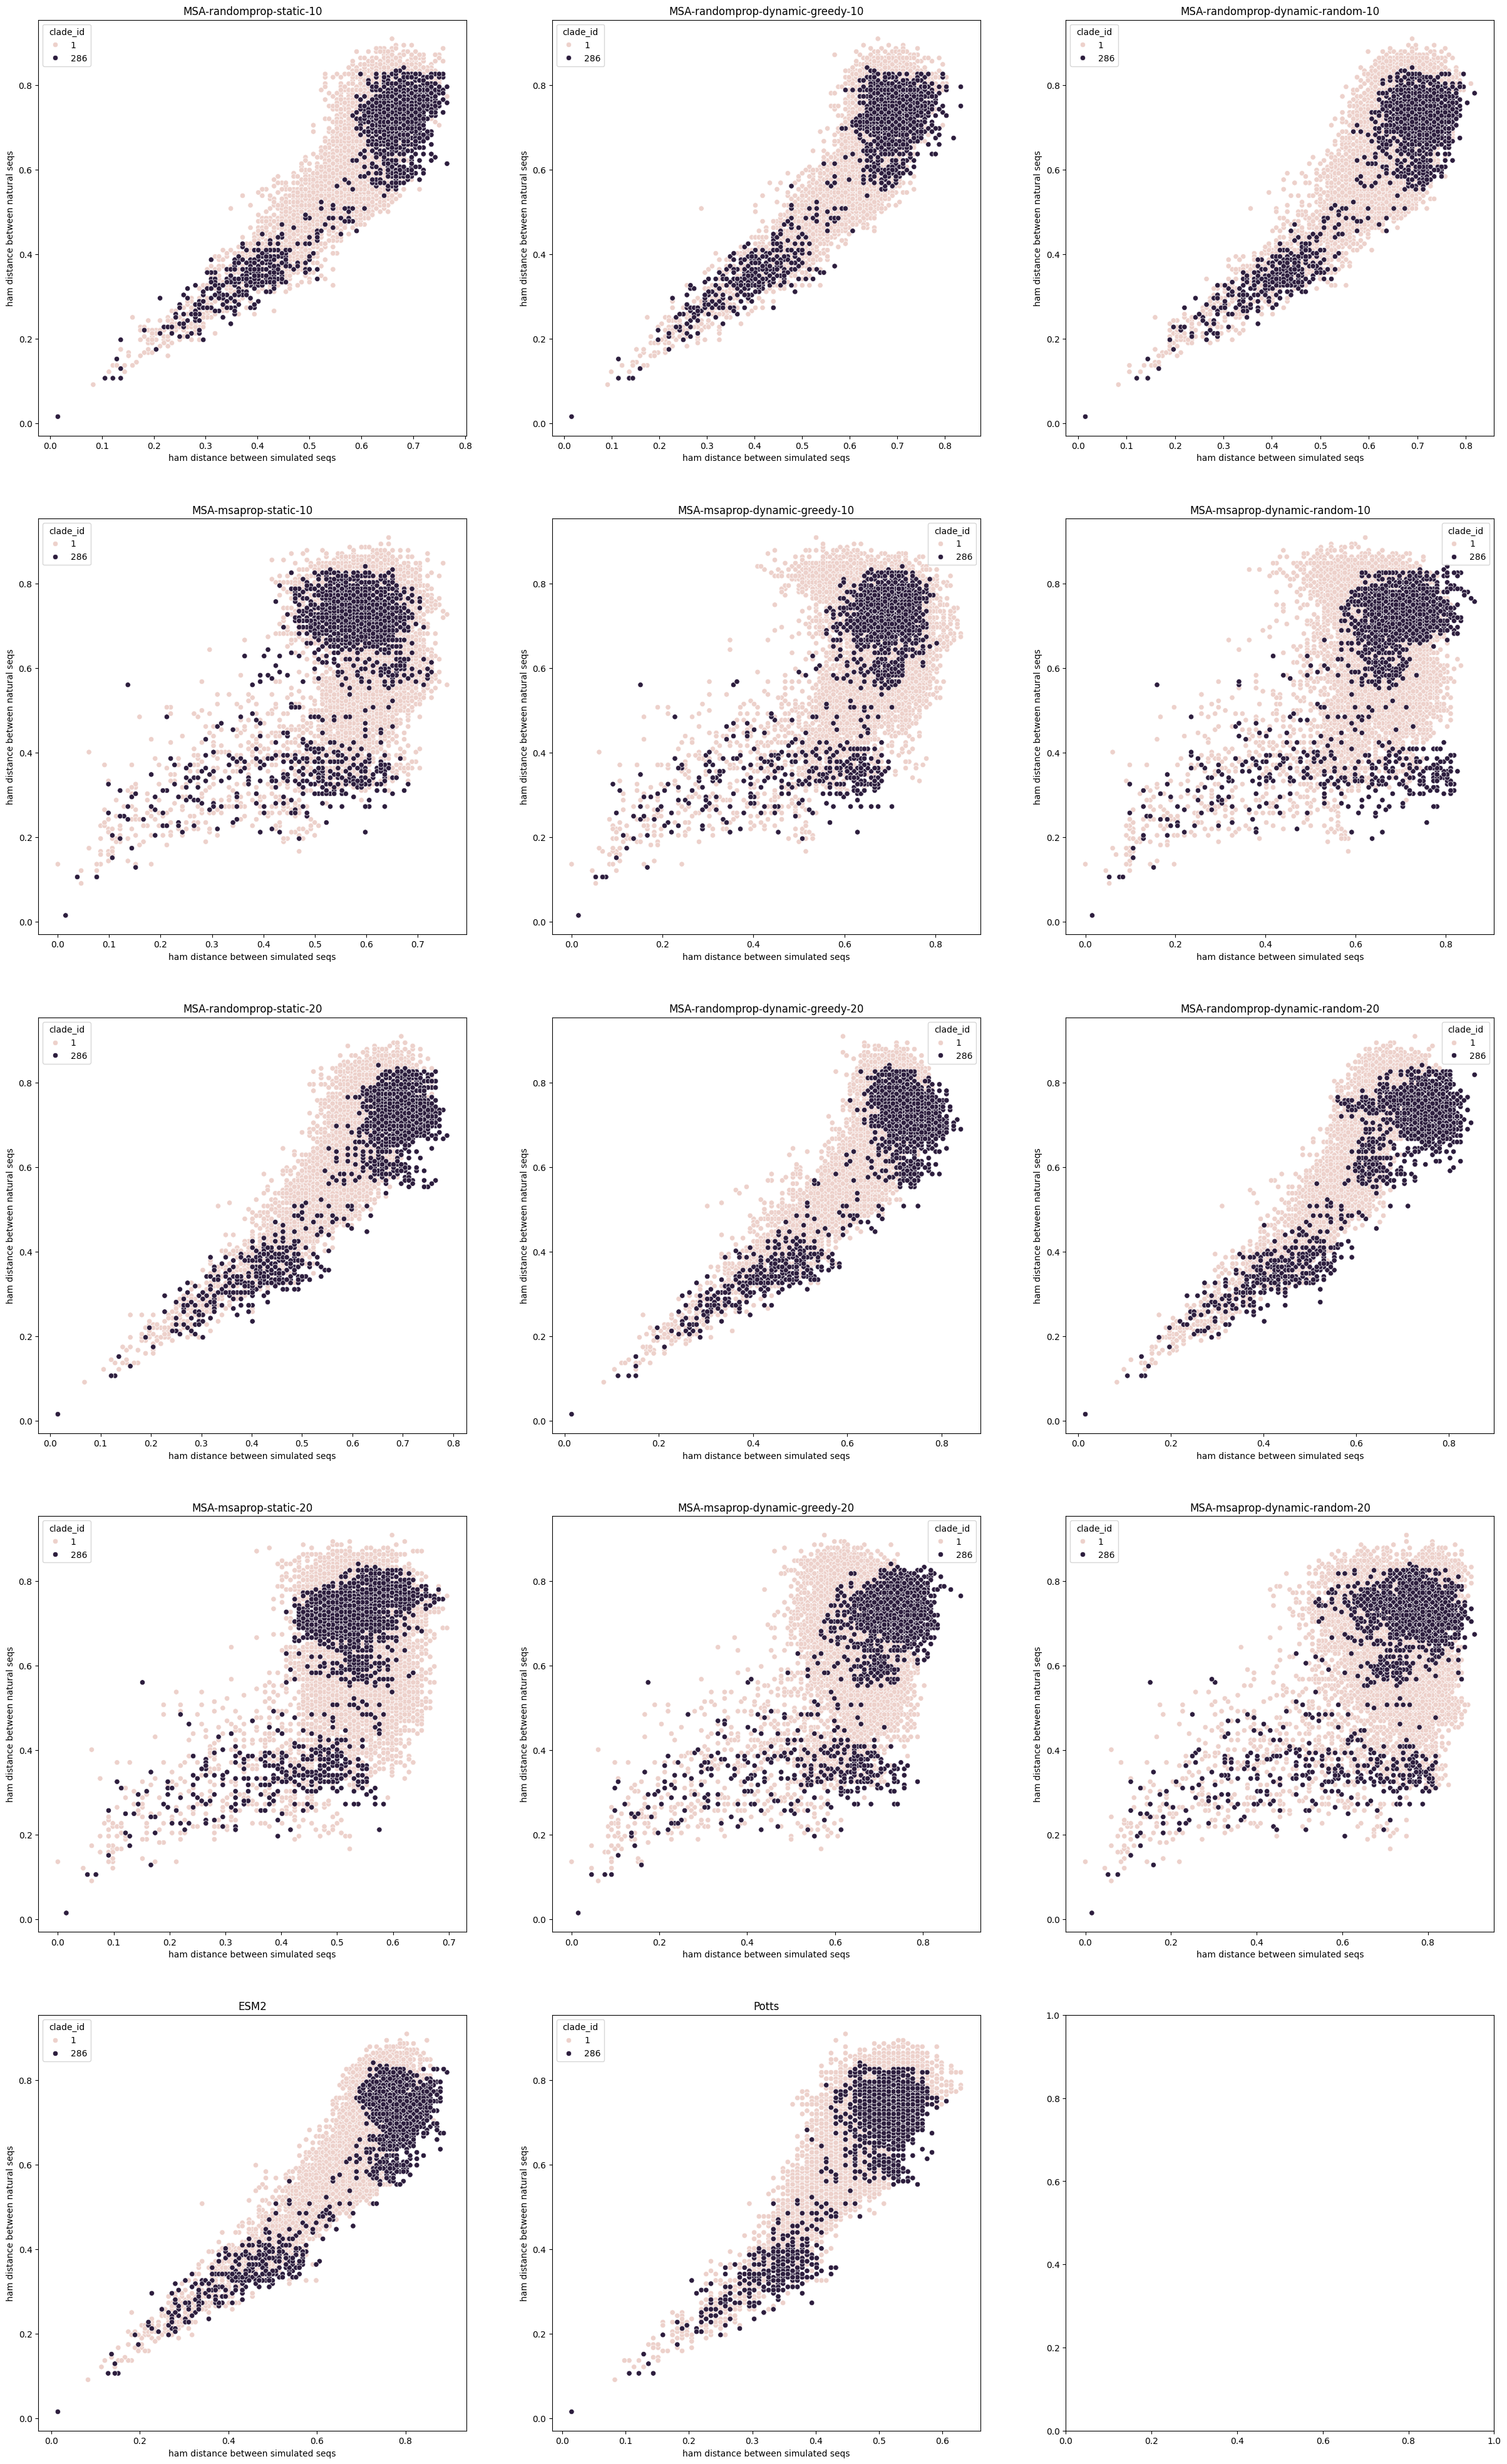

In [89]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import floor,ceil

fig, axes = plt.subplots(nrows = int(ceil(len(tool_types)/3)), ncols = 3, figsize = (30,10 * int(ceil(len(tool_types)/3))))
sim_ind = 1

for k in range(len(tool_types)):

    if tool_types[k] == "nat":
        continue

    i = floor(k/3)
    j = k % 3
    
    main_dataframe_tool_sim = main_dataframe.loc[(main_dataframe["tool"] == tool_types[k]) & (main_dataframe["sim_ind"] == sim_ind), :]
    
    sns.scatterplot(x = "ham_dist_sim", y = "ham_dist_corr_nat", 
                               data = main_dataframe_tool_sim, hue = "clade_id", ax=axes[i][j], alpha = 1)
    axes[i][j].set_title(tool_types[k])
    axes[i][j].set_xlabel("ham distance between simulated seqs")
    axes[i][j].set_ylabel("ham distance between natural seqs")
    # pearson_corr = pearsonr(main_dataframe_tool_sim["ham_dist_sim"], main_dataframe_tool_sim["ham_dist_corr_nat"])
    # axes[i][j].annotate(f"pearson_corr = {pearson_corr.statistic:.2f}",xy = (0.1,0.9), xycoords = "axes fraction")

plt.savefig(f"ham_distances_scatterplots_depth_{depth}.png")